# PROJEKT 1 EDA KRZYSZTOF KOWALSKI
# Celem projektu jest wykonanie eksploracyjnej analizy danych (EDA) zbioru danych pochodzącego z WHO zawierającego informacje dotyczące zanieczyszczeń powietrza na różnych poziomach generalizacji.

## Zbiór danych
Zbiór posiada pomiary z różnych lokalizacji na świecie podzielone na kraje i miasta.

### Kolumny w zbiorze
**Measurement Year** - okres pobierania informacji o zanieczyszczeniach powietrza, rok pomiaru.
\
**PM2.5 (μg/m3)** - Stężenie pyłów PM2.5 w mikrogramach na metr sześcienny.
\
**PM10 (μg/m3)** -  Stężenie pyłów PM10 w mikrogramach na metr sześcienny.
\
**NO2 (μg/m3)** - Stężenie dwutlenku azotu (NO2) w mikrogramach na metr sześcienny.
\
**PM25 temporal coverage (%)** - Pokrycie czasowe danych dotyczących pyłów PM2.5 (%).
\
**PM10 temporal coverage (%)** - Pokrycie czasowe danych dotyczących 
**NO2 temporal coverage (%)** - Pokrycie czasowe danych dotyczących dwutlenku azotu (%).
\
**Reference** - Odwołanie do źródła danych.
\
**Number and type of monitoring stations** - Liczba i typ stacji monitorujących.
\
**Version of the database** - Wersja bazy danych.
\
**Status** - Status danych.danych dotyczących - Status danych.

## 1. Wczytanie zbioru danych

Zbiór danych został wczytany korzystając z funkcji *read_excel*() z bilbioteki *pandas*

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
who_data = pd.read_excel("who_aap_2021_v9_11august2022.xlsx", sheet_name = "AAP_2022_city_v9")

In [3]:
who_data.head()

WHO Region ISO3 WHO Country Name City or Locality  \
0  Eastern Mediterranean Region  AFG      Afghanistan            Kabul   
1               European Region  ALB          Albania           Durres   
2               European Region  ALB          Albania           Durres   
3               European Region  ALB          Albania          Elbasan   
4               European Region  ALB          Albania          Elbasan   

   Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)  \
0              2019         119.77           NaN          NaN   
1              2015            NaN         17.65        26.63   
2              2016          14.32         24.56        24.78   
3              2015            NaN           NaN        23.96   
4              2016            NaN           NaN        26.26   

   PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
0                        18.0                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   NO2 temporal coverage (%)  \
0                        NaN   
1                  83.961187   
2                  87.932605   
3                  97.853881   
4                  96.049636   

                                           Reference  \
0  U.S. Department of State, United States Enviro...   
1   European Environment Agency (downloaded in 2021)   
2   European Environment Agency (downloaded in 2021)   
3   European Environment Agency (downloaded in 2021)   
4   European Environment Agency (downloaded in 2021)   

  Number and type of monitoring stations  Version of the database  Status  
0                                    NaN                     2022     NaN  
1                                    NaN                     2022     NaN  
2                                    NaN                     2022     NaN  
3                                    NaN                     2022     NaN  
4                                    NaN                     2022     NaN

Alternatywną funkcją, z której można skorzystać do wczytania zbioru do odpowiedniej struktury jest użycie itables. W tym celu przekonwertowana została ramka danych korzystając z funkcji *show* z biblioteki *itables*.

Skorzystanie z Itables daje możliwość interatywnego przeglądania wczytanego zbioru. Pozwala między innymi na: \
- sortoowanie po wybranej kolumnie (rosnąco lub malejąco),
- wyszukiwanie określonej wartości w zbiorze korzystając z Search
- ustawieniu ilości rekordów, które widzimy (10, 25, 50 lub 100).

In [4]:
#!pip install itables
from itables import show

In [5]:
itable = show(who_data)
itable

# 2. Eksploracyjna analiza danych (EDA)

Zaczęto od sprawdzenia ilości danych w zbiorze.

In [6]:
who_data.shape

(32191, 15)

In [7]:
who_data.dtypes

WHO Region                                 object
ISO3                                       object
WHO Country Name                           object
City or Locality                           object
Measurement Year                            int64
PM2.5 (μg/m3)                             float64
PM10 (μg/m3)                              float64
NO2 (μg/m3)                               float64
PM25 temporal coverage (%)                float64
PM10 temporal coverage (%)                float64
NO2 temporal coverage (%)                 float64
Reference                                  object
Number and type of monitoring stations     object
Version of the database                     int64
Status                                    float64
dtype: object

Zbiór składa się z 15 kolumn (głownie typu object i float, są też dwie kolumny typu int) oraz 32 tysięcy rekordów.

In [8]:
who_data.describe()

Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)   NO2 (μg/m3)  \
count      32191.000000   15048.000000  21109.000000  22200.000000   
mean        2015.579354      22.920320     30.533252     20.619336   
std            2.752654      17.925906     29.312756     12.133388   
min         2000.000000       0.010000      1.040000      0.000000   
25%         2014.000000      10.350000     16.980000     12.000000   
50%         2016.000000      16.000000     22.000000     18.800000   
75%         2018.000000      31.000000     31.300000     27.160000   
max         2021.000000     191.900000    540.000000    210.680000   

       PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
count                 7275.000000                 5381.000000   
mean                    90.794096                   90.583500   
std                     14.872681                   13.816311   
min                      0.000000                    2.568493   
25%                     88.595890                   87.945205   
50%                     97.000000                   96.039000   
75%                     99.000000                   98.938000   
max                    100.000000                  100.000000   

       NO2 temporal coverage (%)  Version of the database  Status  
count               19890.000000             32191.000000     0.0  
mean                   93.696804              2021.744214     NaN  
std                    10.451751                 1.051897     NaN  
min                     1.923077              2016.000000     NaN  
25%                    93.207763              2022.000000     NaN  
50%                    96.369863              2022.000000     NaN  
75%                    98.926941              2022.000000     NaN  
max                   100.000000              2022.000000     NaN

In [9]:
for col in who_data.columns:
  print(f'W kolumnie \033[1m{col}\033[0m znajduje się \033[1m{sum(who_data[col].isnull())}\033[0m brakujących wartości co stanowi \033[1m{round(100 * sum(who_data[col].isnull()) / len(who_data[col]), 3)}\033[0m%')


W kolumnie WHO Region znajduje się 1 brakujących wartości co stanowi 0.003%
W kolumnie ISO3 znajduje się 0 brakujących wartości co stanowi 0.0%
W kolumnie WHO Country Name znajduje się 0 brakujących wartości co stanowi 0.0%
W kolumnie City or Locality znajduje się 0 brakujących wartości co stanowi 0.0%
W kolumnie Measurement Year znajduje się 0 brakujących wartości co stanowi 0.0%
W kolumnie PM2.5 (μg/m3) znajduje się 17143 brakujących wartości co stanowi 53.254%
W kolumnie PM10 (μg/m3) znajduje się 11082 brakujących wartości co stanowi 34.426%
W kolumnie NO2 (μg/m3) znajduje się 9991 brakujących wartości co stanowi 31.037%
W kolumnie PM25 temporal coverage (%) znajduje się 24916 brakujących wartości co stanowi 77.401%
W kolumnie PM10 temporal coverage (%) znajduje się 26810 brakujących wartości co stanowi 83.284%
W kolumnie NO2 temporal coverage (%) znajduje się 12301 brakujących wartości co stanowi 38.213%
W kolumnie Reference znajduje się 5 brakujących wartości co stanowi 0.016%
W k

W zbiorze znajduje się duża ilość wartości brakujących. Kolumny, w których wartości te są znaczącą częścią wszystkich wartości to:
- PM2.5 (μg/m3): 53.25% wszystkich wartości
- PM10 (μg/m3): 34.43% wszystkich wartości
- NO2 (μg/m3): 31.04% wszystkich wartości
- PM25 temporal coverage (%): 77.4% wszystkich wartości
- PM10 temporal coverage (%): 83.28% wszystkich wartości
- NO2 temporal coverage (%): 38.21% wszystkich wartości
- Number of type of monitoring stations: 72.79% wszystkich wartości
- Status: 100% wszytkich wartości

Przyglądając się bliżej każdej z kolumn, w której występuje mala, niezerowa ilość brakujących wartości:

1.   WHO Region

In [10]:
list(who_data['WHO Region'].unique())

['Eastern Mediterranean Region',
 'European Region',
 'Region of the Americas',
 'Western Pacific Region',
 'South East Asia Region',
 'African Region',
 nan]

In [11]:
who_data[who_data['WHO Region'].isna()]

WHO Region ISO3 WHO Country Name City or Locality  Measurement Year  \
24778        NaN  LIE    Liechtenstein            Vaduz              2010   

       PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)  PM25 temporal coverage (%)  \
24778            NaN         17.88        23.59                         NaN   

       PM10 temporal coverage (%)  NO2 temporal coverage (%)  \
24778                      96.164                     98.265   

                                               Reference  \
24778  European Environment Information and Observati...   

      Number and type of monitoring stations  Version of the database  Status  
24778                                    NaN                     2022     NaN

Brakująca wartość dla kolumny związanej z regionem występuje dla Liechtenstein, który bazując na wartościach z tej kolumny pasuje do "European Region". Dlatego ręcznie podmieniono tą wartość.


In [12]:
who_data.loc[who_data['ISO3'] == "LIE", 'WHO Region'] = 'European Region'

2. Reference


In [13]:
#list(who_data['Reference'].unique())

In [14]:
who_data[who_data['Reference'].isna()]

WHO Region ISO3 WHO Country Name City or Locality  \
28209  Eastern Mediterranean Region  QAT            Qatar             Doha   
28210  Eastern Mediterranean Region  QAT            Qatar             Doha   
28211  Eastern Mediterranean Region  QAT            Qatar             Doha   
28212  Eastern Mediterranean Region  QAT            Qatar             Doha   
28213  Eastern Mediterranean Region  QAT            Qatar             Doha   

       Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)  \
28209              2017           44.0         148.0         29.0   
28210              2018           44.0         181.0         47.0   
28211              2019           41.0         208.0         42.0   
28212              2020           33.0         108.0         28.0   
28213              2021           38.0         150.0         30.0   

       PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
28209                        98.0                        96.0   
28210                        99.0                        97.0   
28211                        97.0                        97.0   
28212                        98.0                        98.0   
28213                        97.0                        96.0   

       NO2 temporal coverage (%) Reference  \
28209                       99.0       NaN   
28210                       99.0       NaN   
28211                       99.0       NaN   
28212                       99.0       NaN   
28213                       99.0       NaN   

          Number and type of monitoring stations  Version of the database  \
28209  Roadside, residential and commercial area                     2022   
28210  Roadside, residential and commercial area                     2022   
28211  Roadside, residential and commercial area                     2022   
28212  Roadside, residential and commercial area                     2022   
28213  Roadside, residential and commercial area                     2022   

       Status  
28209     NaN  
28210     NaN  
28211     NaN  
28212     NaN  
28213     NaN

Wszystkie 5 brakujących wartości dla tej kolumny pochodzi z Qataru, ponieważ cieżko przewidzieć wartość bazując na innych informacjach - pozostawiono te wartości NaN.

Ponieważ, kolumna **Status** nie wnosi nic do analizy danych (występują w niej same wartości brakujące) postanowiono ją usunąć ze zbioru. 
\
Dodatkowo kolumna **Verion of the database** również nie wnosi nic do analizy. Ukazuje ona jedynie wersjie bazy danych (w postaci roku), dlatego zdecydowano również usunąc ją.
\
Obie kolumny są technicznymi kolumnami, ważnymi do przetrzymywania danych w bazie danych, ale nieprzydatnymi dla analizy. 

In [15]:
who_data.drop(columns = 'Status', inplace = True)
who_data.drop(columns = 'Version of the database', inplace = True)

## Zależność między zmiennymi

Ten etap EDA zaczęto od stworzenia macierzy korelacji. Oraz stworzenia wykresu ukazującego korelację.

In [16]:
correlation_matrix = who_data.corr(numeric_only = True)
correlation_matrix

Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  \
Measurement Year                    1.000000       0.091205     -0.001178   
PM2.5 (μg/m3)                       0.091205       1.000000      0.874187   
PM10 (μg/m3)                       -0.001178       0.874187      1.000000   
NO2 (μg/m3)                        -0.111787       0.430170      0.305560   
PM25 temporal coverage (%)         -0.010997      -0.096469     -0.319848   
PM10 temporal coverage (%)         -0.180056      -0.208969     -0.232562   
NO2 temporal coverage (%)           0.085096      -0.209094     -0.289788   

                            NO2 (μg/m3)  PM25 temporal coverage (%)  \
Measurement Year              -0.111787                   -0.010997   
PM2.5 (μg/m3)                  0.430170                   -0.096469   
PM10 (μg/m3)                   0.305560                   -0.319848   
NO2 (μg/m3)                    1.000000                   -0.091963   
PM25 temporal coverage (%)    -0.091963                    1.000000   
PM10 temporal coverage (%)     0.007328                    0.609317   
NO2 temporal coverage (%)     -0.026477                    0.342581   

                            PM10 temporal coverage (%)  \
Measurement Year                             -0.180056   
PM2.5 (μg/m3)                                -0.208969   
PM10 (μg/m3)                                 -0.232562   
NO2 (μg/m3)                                   0.007328   
PM25 temporal coverage (%)                    0.609317   
PM10 temporal coverage (%)                    1.000000   
NO2 temporal coverage (%)                     0.679646   

                            NO2 temporal coverage (%)  
Measurement Year                             0.085096  
PM2.5 (μg/m3)                               -0.209094  
PM10 (μg/m3)                                -0.289788  
NO2 (μg/m3)                                 -0.026477  
PM25 temporal coverage (%)                   0.342581  
PM10 temporal coverage (%)                   0.679646  
NO2 temporal coverage (%)                    1.000000

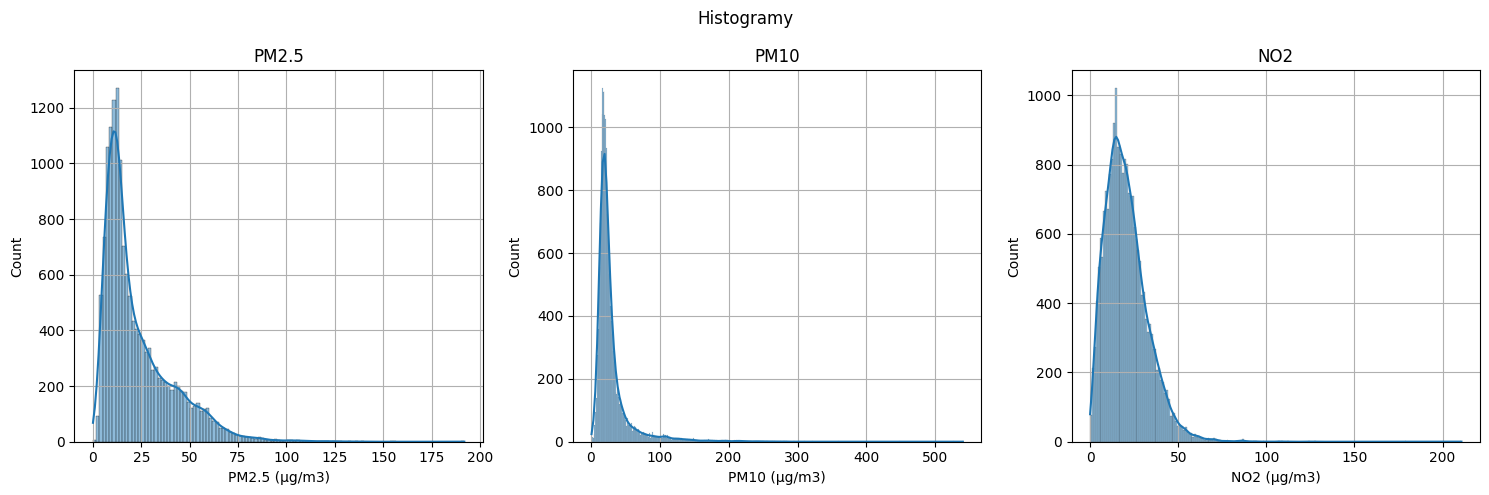

In [17]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 3, 1)
sns.histplot(data = who_data, x = 'PM2.5 (μg/m3)', kde = True)
plt.title('PM2.5')
plt.grid()

plt.subplot(1, 3, 2)
sns.histplot(data = who_data, x = 'PM10 (μg/m3)', kde = True)
plt.title('PM10')
plt.grid()

plt.subplot(1, 3, 3)
sns.histplot(data = who_data, x = 'NO2 (μg/m3)', kde = True)
plt.title('NO2')
plt.grid()

plt.suptitle("Histogramy")
plt.tight_layout()

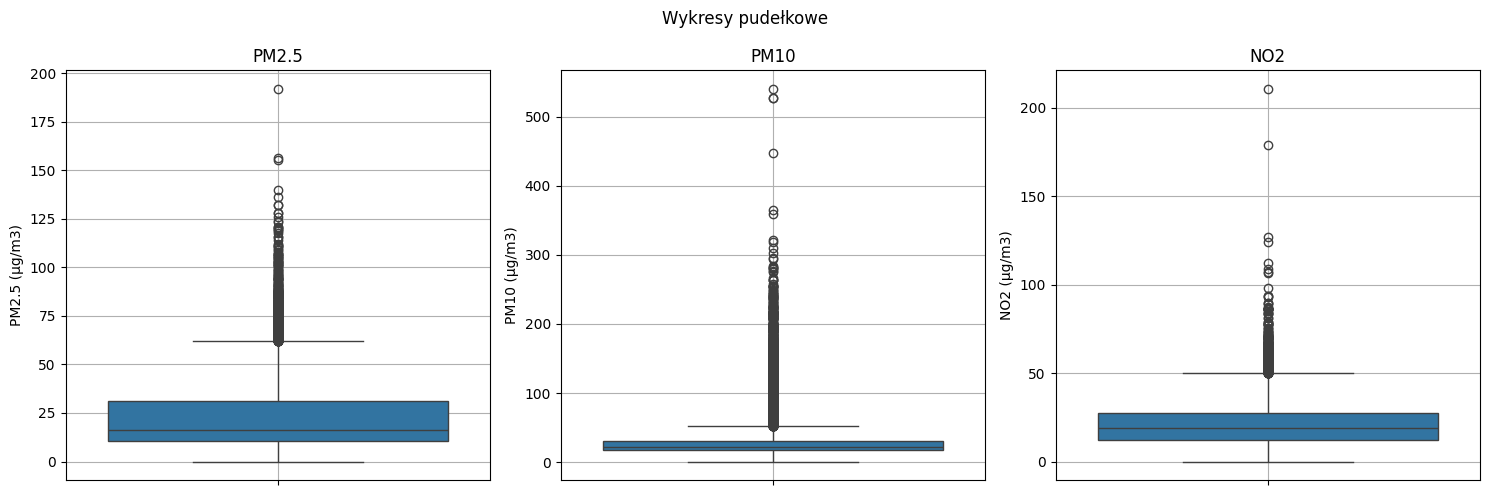

In [18]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 3, 1)
sns.boxplot(data = who_data, y='PM2.5 (μg/m3)')
plt.title('PM2.5')
plt.grid()

plt.subplot(1, 3, 2)
sns.boxplot(data = who_data, y = 'PM10 (μg/m3)')
plt.title('PM10')
plt.grid()

plt.subplot(1, 3, 3)
sns.boxplot(data = who_data, y = 'NO2 (μg/m3)')
plt.title('NO2')
plt.grid()

plt.suptitle("Wykresy pudełkowe")
plt.tight_layout()

Histogramy stężeń zanieczyszczeń nie posiadają rozkładów normalnych. Dla poszczególnych zanieczyszczeń bazując na histogramach i wykresach pudełkowych:
- PM2.5 posiada największa ilość wystąpień około 1200 dla wartości stężenia około 15
- PM10 posiada podobny rozkład do PM2.5 - posiada znacznie wyższa zmierzoną wartość maksymalną
- NO2 posiada delikatnie wyższą najczęściej występująca wartość - około 20

Text(0.5, 1.0, 'Macierz korelacji dla danych dotyczących zanieczyszczenia powietrza')

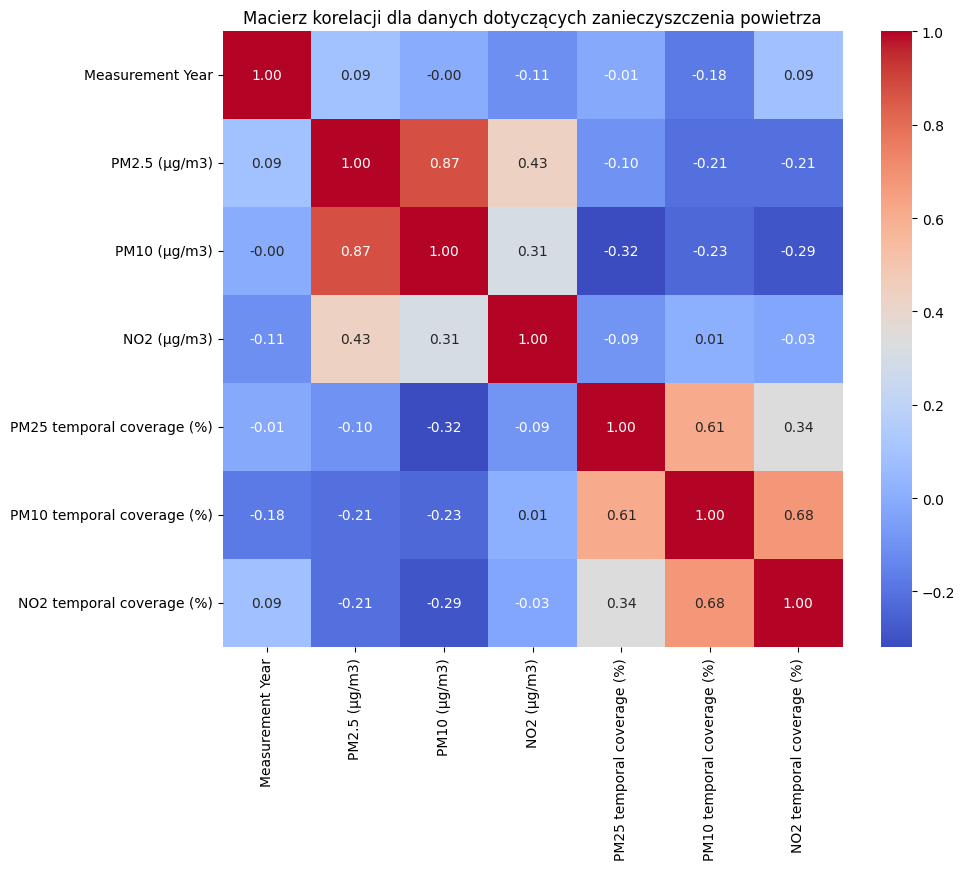

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji dla danych dotyczących zanieczyszczenia powietrza')

Macierz korelacji ukazuje występowanie zależnosci liniowej pomiędzy zmiennymi. Wysoka zależność dodatnia występuje pomiędzy kolumnami związanymi z zanieczyszczeniami PM2.5 oraz PM10, które dodatkowo są dosyć dobrze skorelowane z kolejną kolumna związana z zanieczyszczeniami jaką jest NO2.
\
Pomiędzy pozostałymi kolumnami korelacja jest niewielka (zarówno dodatnia jak i ujemna).

Przyglądając się jeszcze bliżej zależności liniowej stworzono wykres typu *pairplot*.

Text(0.5, 1.0, 'Wykresy zależności liniowej między zmiennymi')

<Figure size 1000x800 with 0 Axes>

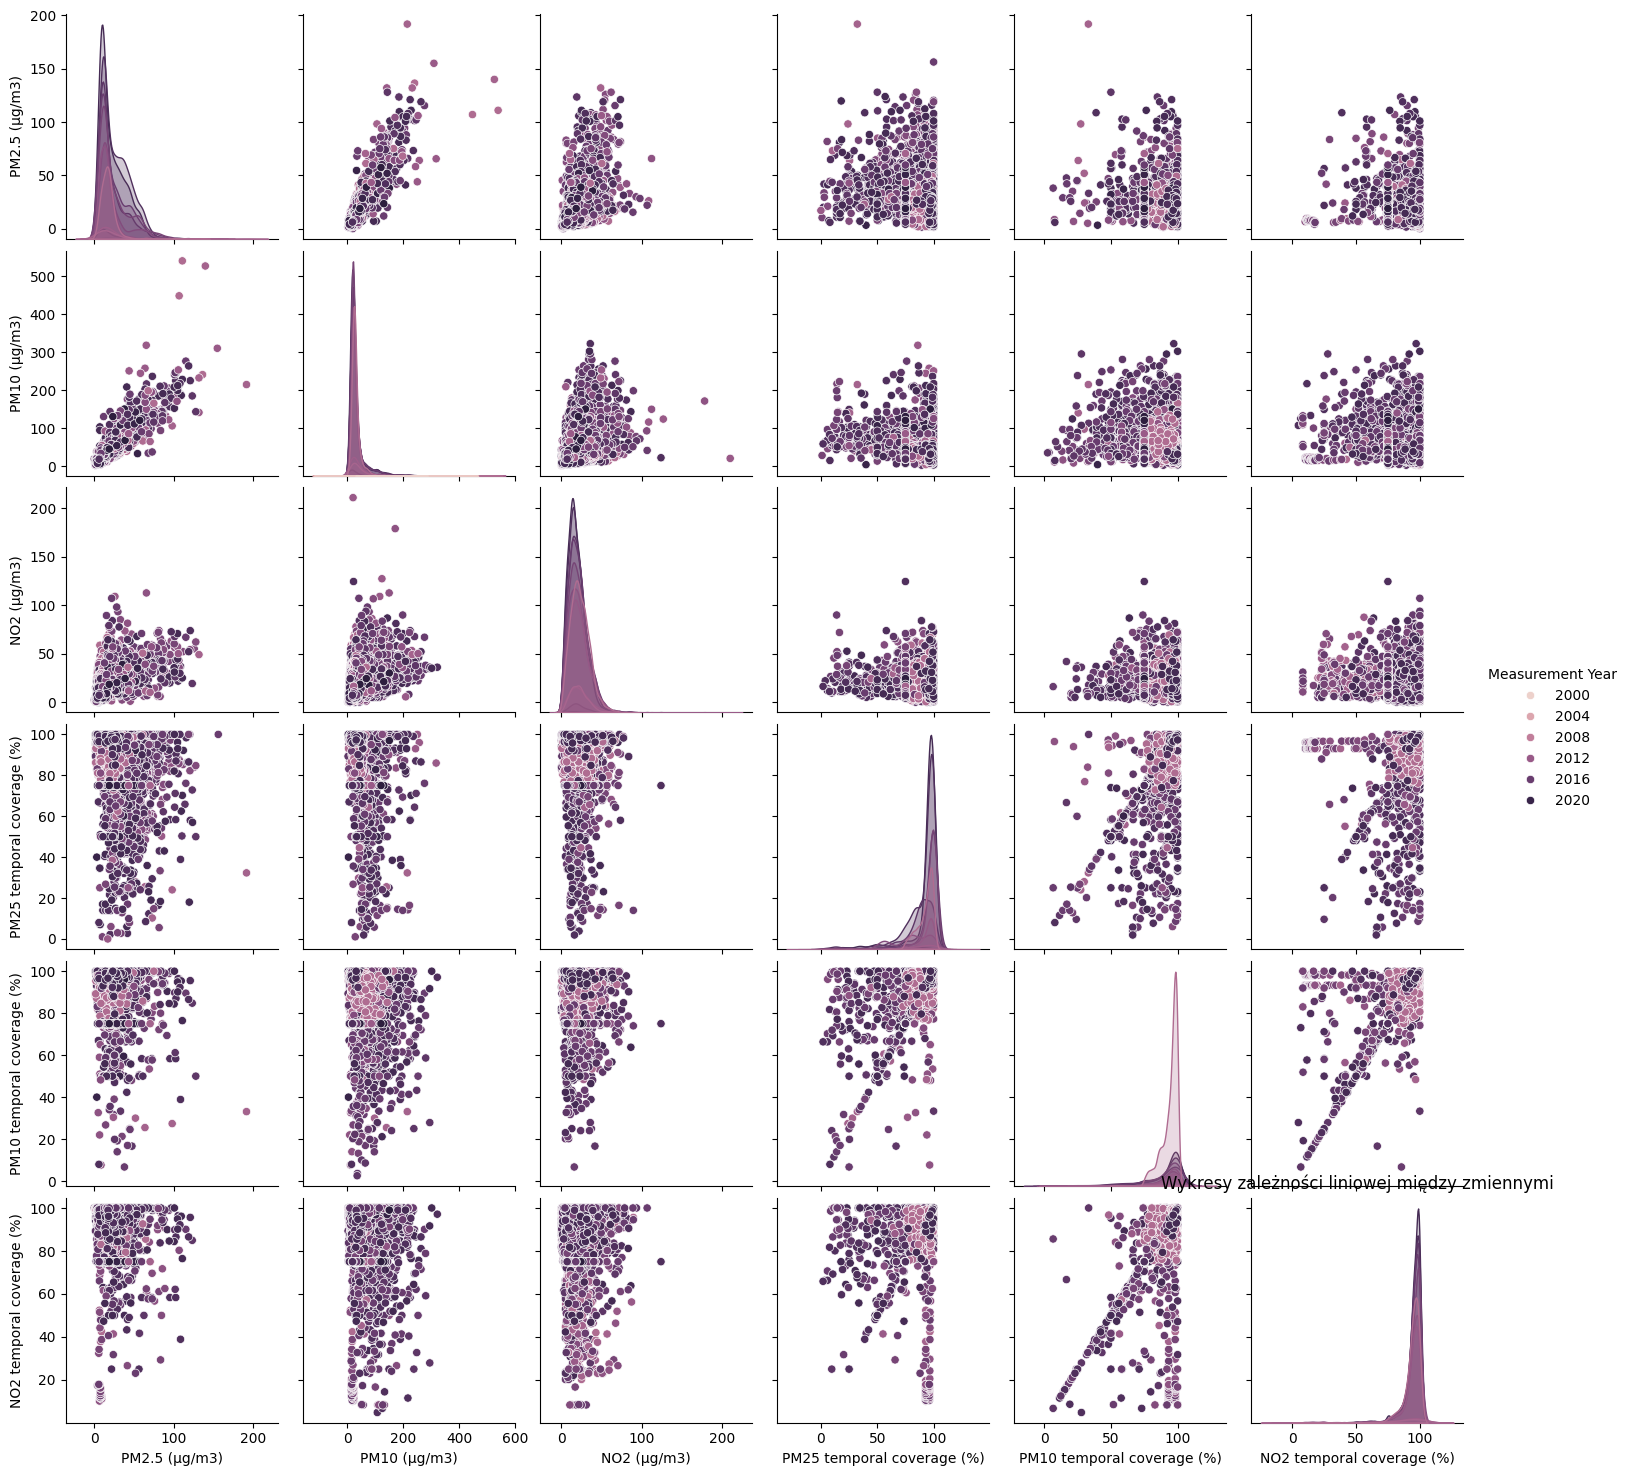

In [20]:
plt.figure(figsize=(10, 8))
sns.pairplot(who_data, hue = 'Measurement Year')
plt.title('Wykresy zależności liniowej między zmiennymi')

Powyższa figura potwierdza występowanie dodaniej zależności liniowej między zmiennymi związanymi z wielkością określonego zanieczyszczenia.

# 3. EDA na różnych poziomach generalizacji

## a) Region

### Analiza ogólnych statystyk

In [21]:
region_stats = who_data.groupby('WHO Region').agg({'PM2.5 (μg/m3)': ['mean', 'median', 'std'],
                                                   'PM10 (μg/m3)': ['mean', 'median', 'std'],
                                                   'NO2 (μg/m3)': ['mean', 'median', 'std']})
region_stats

PM2.5 (μg/m3)                   PM10 (μg/m3)  \
                                      mean median        std         mean   
WHO Region                                                                  
African Region                   27.257120  22.86  20.435911    51.906625   
Eastern Mediterranean Region     38.063258  33.00  19.843202   121.317951   
European Region                  14.002193  12.81   6.315753    23.013879   
Region of the Americas           11.389410   8.00   8.387063    30.677423   
South East Asia Region           42.841212  36.50  23.432654    94.626582   
Western Pacific Region           40.324123  39.11  18.012102    32.781478   

                                                 NO2 (μg/m3)                    
                               median        std        mean median        std  
WHO Region                                                                      
African Region                 41.390  38.927441   23.160242  19.51  15.597572  
Eastern Mediterranean Region  109.800  76.441168   45.715101  38.05  29.840508  
European Region                20.740  10.934350   20.389040  18.98  11.319598  
Region of the Americas         26.085  18.969999   15.757890  14.00  10.055134  
South East Asia Region         84.000  51.400386   22.099986  19.33  12.845567  
Western Pacific Region         22.400  27.102957   31.970357  33.00  14.094483

Rejony w zależności od mierzonego stężenia zanieczysczenia posiadają różny rankinch najwyższych średnich stężeń zanieczyszczeń. I tak:
- dla PM2.5 najwyższą średnia posiada Południowo-Wschodnia Azja, a najniższą Ameryka
- dla PM10 najwyższą średnią posiada region Morza Śródziemnego, natomiast najniższą Europa
- dla NO2 najwyższą średnią posiada region Morza Śródziemnego, natomiast najniższą Ameryka

### Liczba obserwacji w każdym z regionów 

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'European Region'),
  Text(1, 0, 'Western Pacific Region'),
  Text(2, 0, 'Region of the Americas'),
  Text(3, 0, 'South East Asia Region'),
  Text(4, 0, 'Eastern Mediterranean Region'),
  Text(5, 0, 'African Region')])

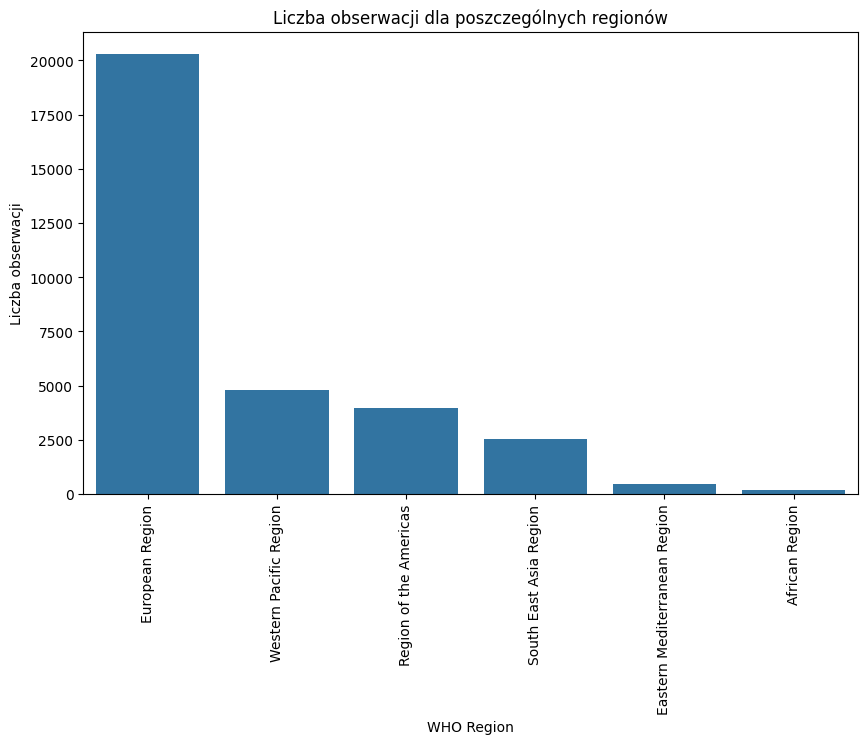

In [22]:
plt.figure(figsize = [10, 6])
region_counts = who_data['WHO Region'].value_counts()
sns.barplot(x = region_counts.index, y = region_counts.values)
plt.title('Liczba obserwacji dla poszczególnych regionów')
plt.xlabel('WHO Region')
plt.ylabel('Liczba obserwacji')
plt.xticks(rotation = 90)

Regionem najczęściej badanym jest Europa z ogromną różnicą wyprzedza inne rejony z iloscią obserwacji około 20 000 (dla porównania drugi z rejonów - Zachód Pacyfiku posiada około 5 000 obserwacji). Region Afrykański jest najrzadziej badany. Niską ilościa obserwacji cechuje się również wschodni rejon Morza Śródziemnego (co może byc powodem niespodziewnanie wysokich wartości stężeń zanieczyszczeń na tym obszarze). 

### Wykresy rozrzutu

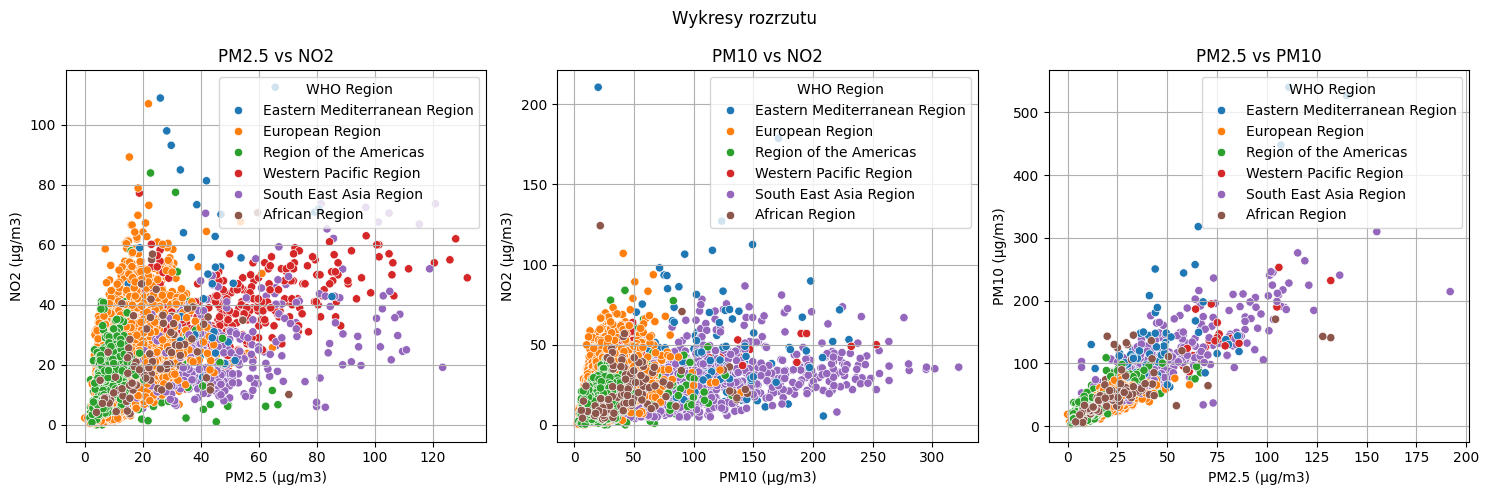

In [23]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 3, 1)
sns.scatterplot(data = who_data, x = 'PM2.5 (μg/m3)', y = 'NO2 (μg/m3)', hue = 'WHO Region')
plt.title('PM2.5 vs NO2')
plt.grid()

plt.subplot(1, 3, 2)
sns.scatterplot(data = who_data, x = 'PM10 (μg/m3)', y = 'NO2 (μg/m3)', hue = 'WHO Region')
plt.title('PM10 vs NO2')
plt.grid()

plt.subplot(1, 3, 3)
sns.scatterplot(data = who_data, x = 'PM2.5 (μg/m3)', y = 'PM10 (μg/m3)', hue = 'WHO Region')
plt.title('PM2.5 vs PM10')
plt.grid()

plt.suptitle("Wykresy rozrzutu")
plt.tight_layout()

Każda z badanych par stężeń zanieczyszczeń prezentuje się inaczej. W przypadku porównania PM2.5 i PM10 widoczna jest najwyższa dodatnia zależność liniowa dla każdego z rejonów (gorsze zależności są dla regionu afrykańskiego i Morza Śródziemnego, ale są to rejony posiadające najmniejszą liczbę obserwacji). Dla wszystkich z par tendencja każdego z rejonów jest podobna.

### Zmiana zanieczyszczeń w czasie

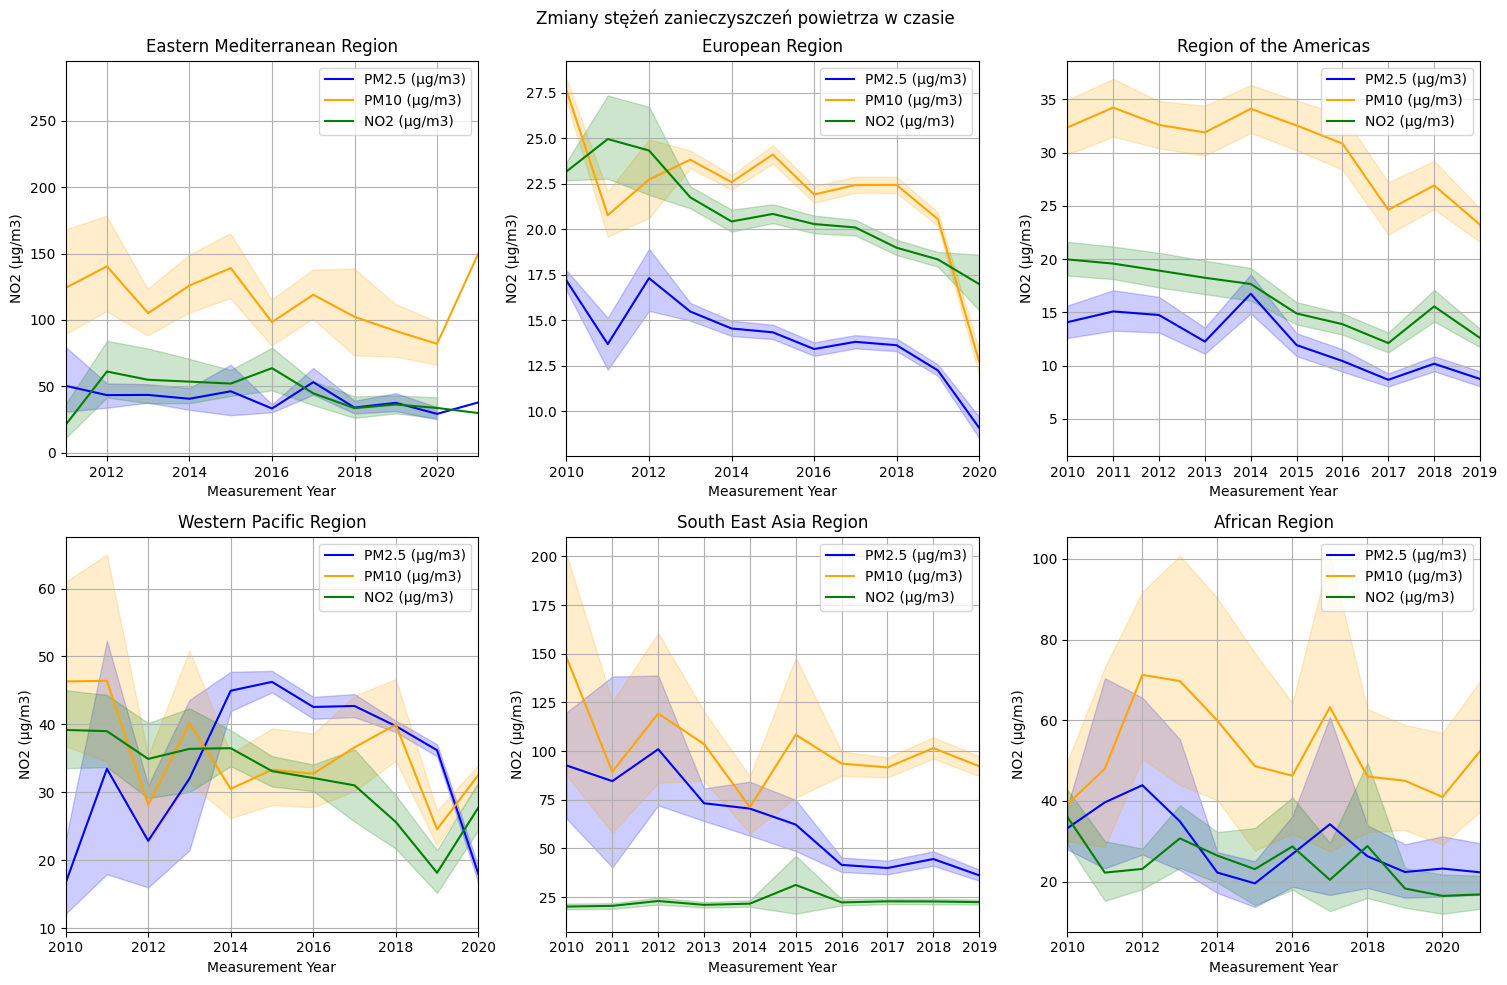

In [24]:
pollutants = ['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']
who_regions = who_data['WHO Region'].unique()
colors = ['blue', 'orange', 'green']

fig, axes = plt.subplots(2, 3, figsize = [15, 10])

for j, region in enumerate(who_regions):
    region_data = who_data[who_data['WHO Region'] == region]
    for k, pollutant in enumerate(pollutants):
        pollutant_data = region_data[['Measurement Year', pollutant]].dropna()
        sns.lineplot(data = pollutant_data, x = 'Measurement Year', y = pollutant, ax = axes[j // 3, j % 3], color = colors[k], label = pollutant)
        axes[j // 3, j % 3].set_title(region)
        axes[j // 3, j % 3].set_xlabel('Measurement Year')
        axes[j // 3, j % 3].set_ylabel(pollutant)
        axes[j // 3, j % 3].grid()
        axes[j // 3, j % 3].set_xlim(pollutant_data['Measurement Year'].min(), pollutant_data['Measurement Year'].max())

axes[-1, -1].legend()
plt.suptitle('Zmiany stężeń zanieczyszczeń powietrza w czasie')
plt.tight_layout()

Przyglądają się zmianie stężeń zanieczyszczeń w czasie w rejonie najczęściej badanym (Europa) widoczny jest spadek stężeń w ostatnich latach. Podobna sytuacja widoczna jest dla rejonu Ameryk. Ciekawie prezentuje sięwykres dla obszaru zachodu Pacyfiku - widoczny jest drastyczny spadek cząsteczek PM2.5 przy wzroście PM10 i NO2. Dla południowo-wschodniej Azji stężenia w latach (2016-2019) ustabilizowały się na podobnym poziomie.

### Macierze korelacji

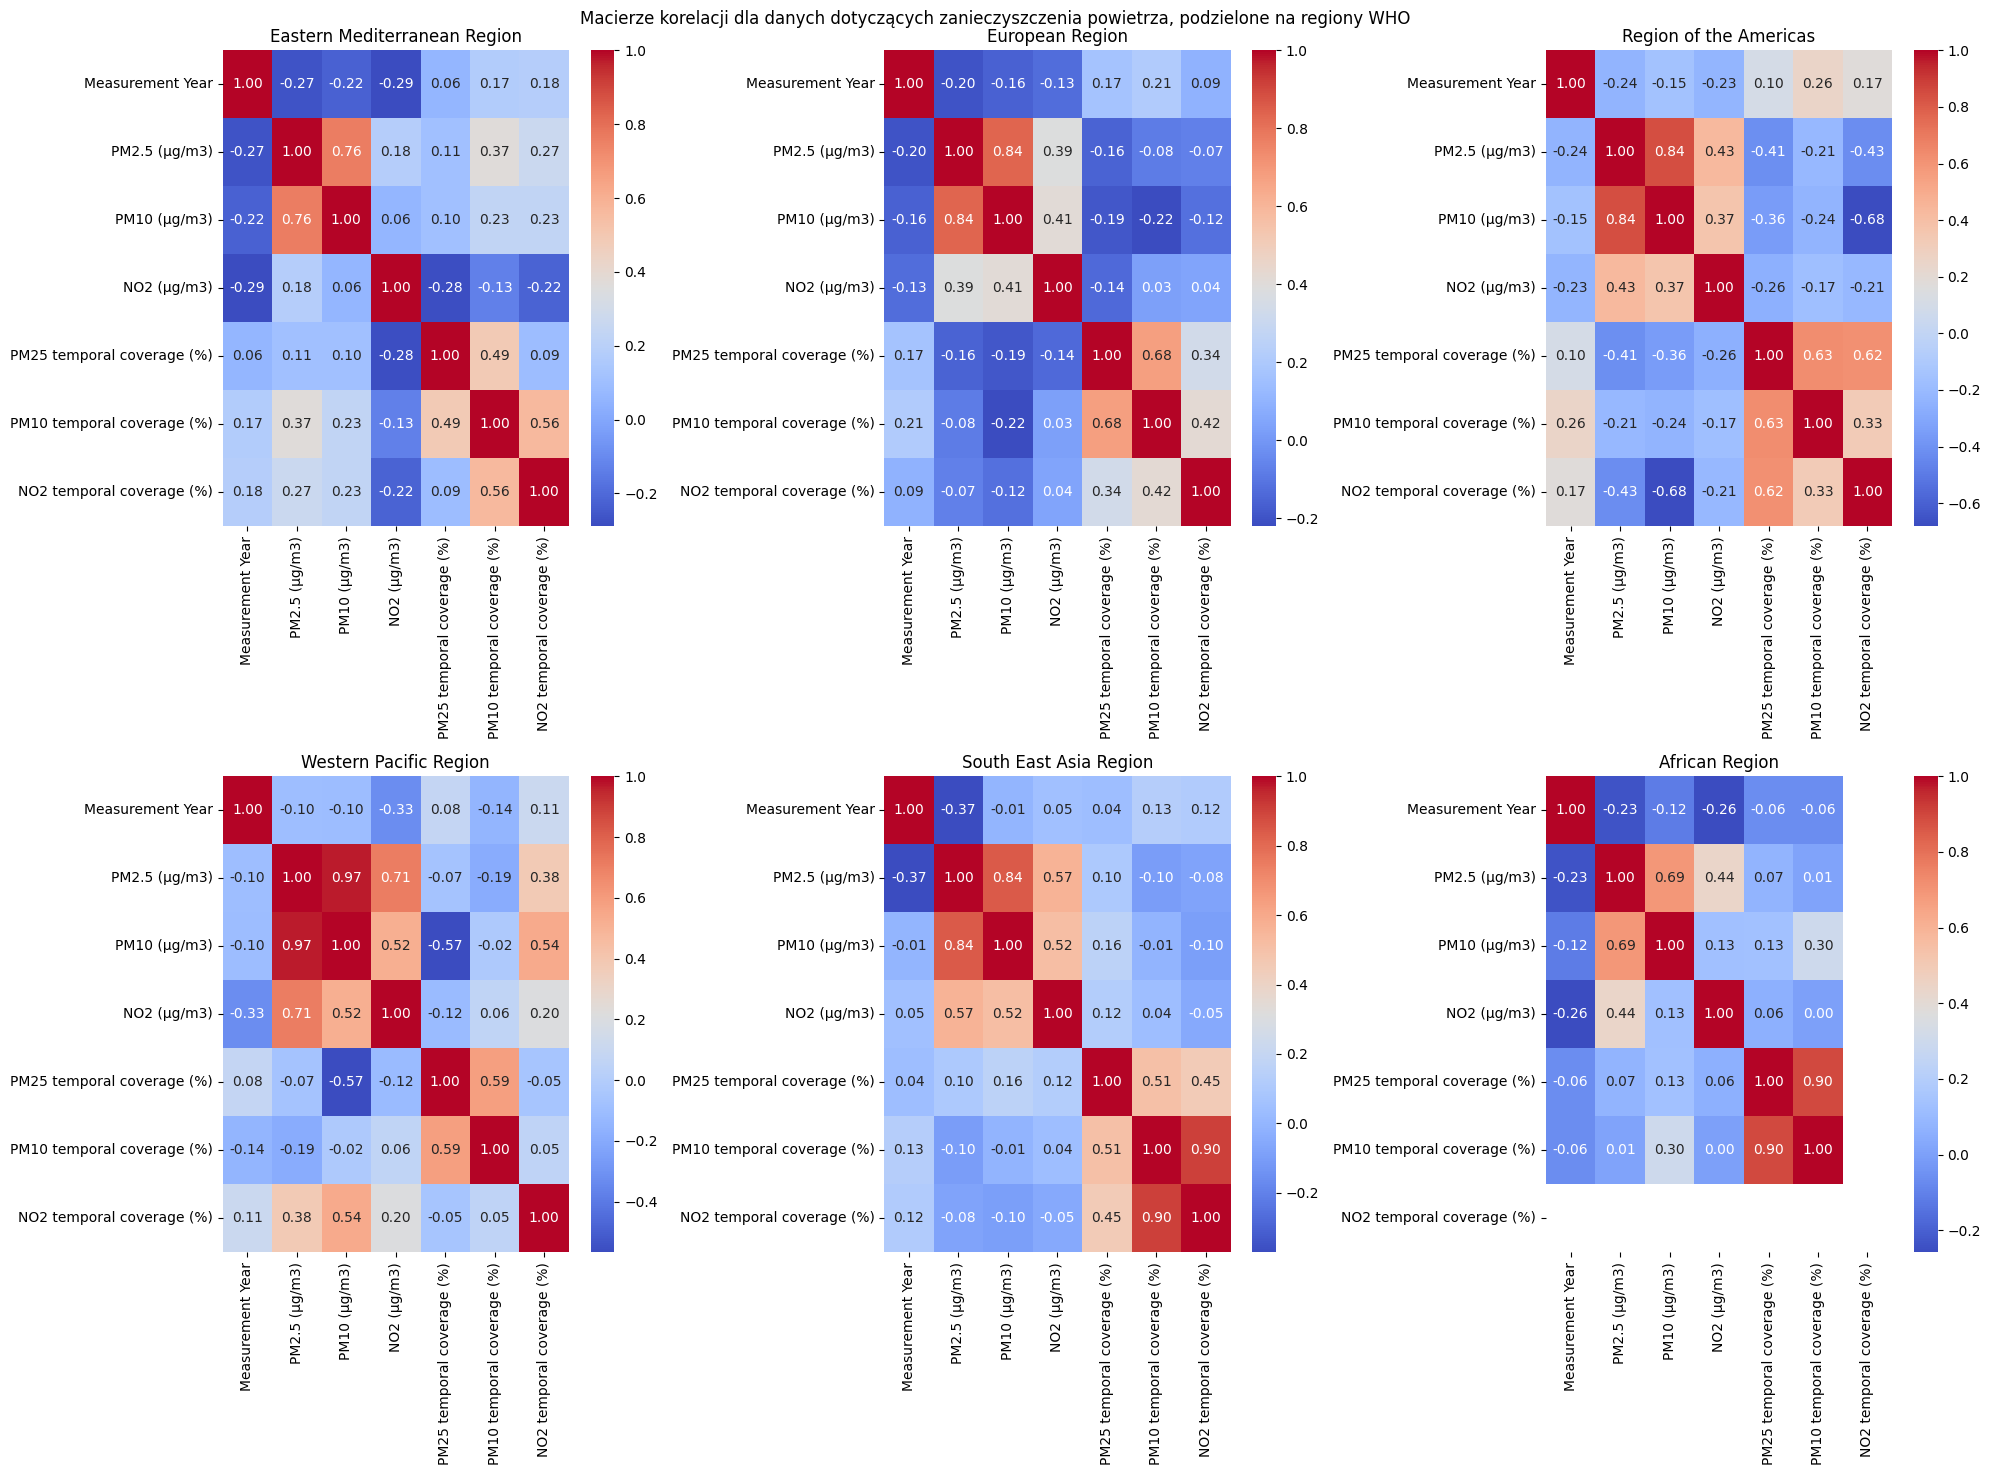

In [25]:
fig, axes = plt.subplots(2, 3, figsize = [20, 15])

for i, region in enumerate(who_regions):
    region_data = who_data[who_data['WHO Region'] == region]
    correlation_matrix = region_data.corr(numeric_only = True)
    sns.heatmap(correlation_matrix, ax = axes[i // 3, i % 3], annot = True, cmap = 'coolwarm', fmt = ".2f")
    axes[i // 3, i % 3].set_title(region)
    axes[i // 3, i % 3].set_xticklabels(axes[i // 3, i % 3].get_xticklabels(), rotation = 90)

plt.suptitle('Macierze korelacji dla danych dotyczących zanieczyszczenia powietrza, podzielone na regiony WHO')
plt.tight_layout()

Macierze korelacji ukazują podobną informacje do wykresów rozrzutu - dobrze skorelowane są wszystkie z mierzonych cząstek (szczególnie PM2.5 i PM10). Najwyższa korelacja widoczna jest dla Rejonu zachodu Pacyfiku (0.97 pomiedzy PM2.5 i PM10i aż 0.71 pomiędzy NO2 i PM2.5). Ciekawa obserwacją jest identyczna korelacja pomiędzy stężeniami PM2.5 i PM10 dla południowo-wschodnie Azji, Europy i Ameryk (0.84)

## b) Kraje

### Analiza ogólnych statystyk

In [26]:
country_stats = who_data.groupby('WHO Country Name').agg({'PM2.5 (μg/m3)': ['mean', 'median', 'std'],
                                                   'PM10 (μg/m3)': ['mean', 'median', 'std'],
                                                   'NO2 (μg/m3)': ['mean', 'median', 'std']})
top_5_pm25 = country_stats['PM2.5 (μg/m3)']['mean'].nlargest(5)
top_5_pm10 = country_stats['PM10 (μg/m3)']['mean'].nlargest(5)
top_5_no2 = country_stats['NO2 (μg/m3)']['mean'].nlargest(5)

print("Top 5 kraje o najwyższych średnich stężeniach PM2.5:")
print(country_stats.loc[top_5_pm25.index, [('PM2.5 (μg/m3)', 'mean'), ('PM2.5 (μg/m3)', 'median'), ('PM2.5 (μg/m3)', 'std')]])

print("\nTop 5 kraje o najwyższych średnich stężeniach PM10:")
print(country_stats.loc[top_5_pm10.index, [('PM10 (μg/m3)', 'mean'), ('PM10 (μg/m3)', 'median'), ('PM10 (μg/m3)', 'std')]])

print("\nTop 5 kraje o najwyższych średnich stężeniach NO2:")
print(country_stats.loc[top_5_no2.index, [('NO2 (μg/m3)', 'mean'), ('NO2 (μg/m3)', 'median'), ('NO2 (μg/m3)', 'std')]])

Top 5 kraje o najwyższych średnich stężeniach PM2.5:
                 PM2.5 (μg/m3)                   
                          mean  median        std
WHO Country Name                                 
Afghanistan         119.770000  119.77        NaN
Cameroon             82.666667   67.00  43.661577
Bangladesh           75.127000   70.52  28.373649
Mongolia             73.865833   74.50  27.980191
Tajikistan           71.520000   71.52        NaN

Top 5 kraje o najwyższych średnich stężeniach PM10:
                 PM10 (μg/m3)                     
                         mean   median         std
WHO Country Name                                  
Pakistan             333.5425  323.000  190.140257
Egypt                227.0000  225.000   51.648814
Ghana                175.3750  177.785   16.977449
Uganda               170.4000  170.400         NaN
Mongolia             169.2200  153.050   45.885529

Top 5 kraje o najwyższych średnich stężeniach NO2:
                           NO2 (μg

Powyżej widoczne jest 5 krajów posiadajace najwyższe średnie stęzenia każdego z mierzonych zanieczyszczeń. Są to kraje azjatyckie oraz afrykańskie. Co, ciekawe dla każdej z cząstek istnieją różne "liderujące" kraje (wyjątkiem jest Mongolia, która pojawia się w każdym z rankingów).

In [27]:
less_5_pm25 = country_stats['PM2.5 (μg/m3)']['mean'].nsmallest(5)
less_5_pm10 = country_stats['PM10 (μg/m3)']['mean'].nsmallest(5)
less_5_no2 = country_stats['NO2 (μg/m3)']['mean'].nsmallest(5)

print("Top 5 kraje o najniższych średnich stężeniach PM2.5:")
print(country_stats.loc[less_5_pm25.index, [('PM2.5 (μg/m3)', 'mean'), ('PM2.5 (μg/m3)', 'median'), ('PM2.5 (μg/m3)', 'std')]])

print("\nTop 5 kraje o najniższych średnich stężeniach PM10:")
print(country_stats.loc[less_5_pm10.index, [('PM10 (μg/m3)', 'mean'), ('PM10 (μg/m3)', 'median'), ('PM10 (μg/m3)', 'std')]])

print("\nTop 5 kraje o najniższych średnich stężeniach NO2:")
print(country_stats.loc[less_5_no2.index, [('NO2 (μg/m3)', 'mean'), ('NO2 (μg/m3)', 'median'), ('NO2 (μg/m3)', 'std')]])

Top 5 kraje o najniższych średnich stężeniach PM2.5:
                 PM2.5 (μg/m3)                 
                          mean median       std
WHO Country Name                               
Bahamas               4.163333  4.060  1.018937
Iceland               5.588065  4.550  3.349053
Estonia               6.018148  5.620  1.679390
Sweden                6.165315  5.900  2.220703
Finland               6.200472  6.135  1.577751

Top 5 kraje o najniższych średnich stężeniach PM10:
                 PM10 (μg/m3)                 
                         mean median       std
WHO Country Name                              
Bahamas              4.650000   4.49  1.088853
Iceland             10.614054   7.42  6.396617
Estonia             12.723000  12.79  4.051279
Finland             12.739095  12.37  3.481434
Canada              13.651172  13.00  4.420643

Top 5 kraje o najniższych średnich stężeniach NO2:
                    NO2 (μg/m3)                 
                           mean m

Ranking dla krajów posiadających najniższe średnie stężenia ukazuje kraje, które pochodzą głównie z Europy oraz rejonu Ameryk. Bardzo niskie średnie wartości dla wszystkich z mierzonych cząstek są w Islandi, Estoni oraz Finlandii.

### Ilość obserwacji dla krajów z najwyższymi stężeniami zanieczyszczeń

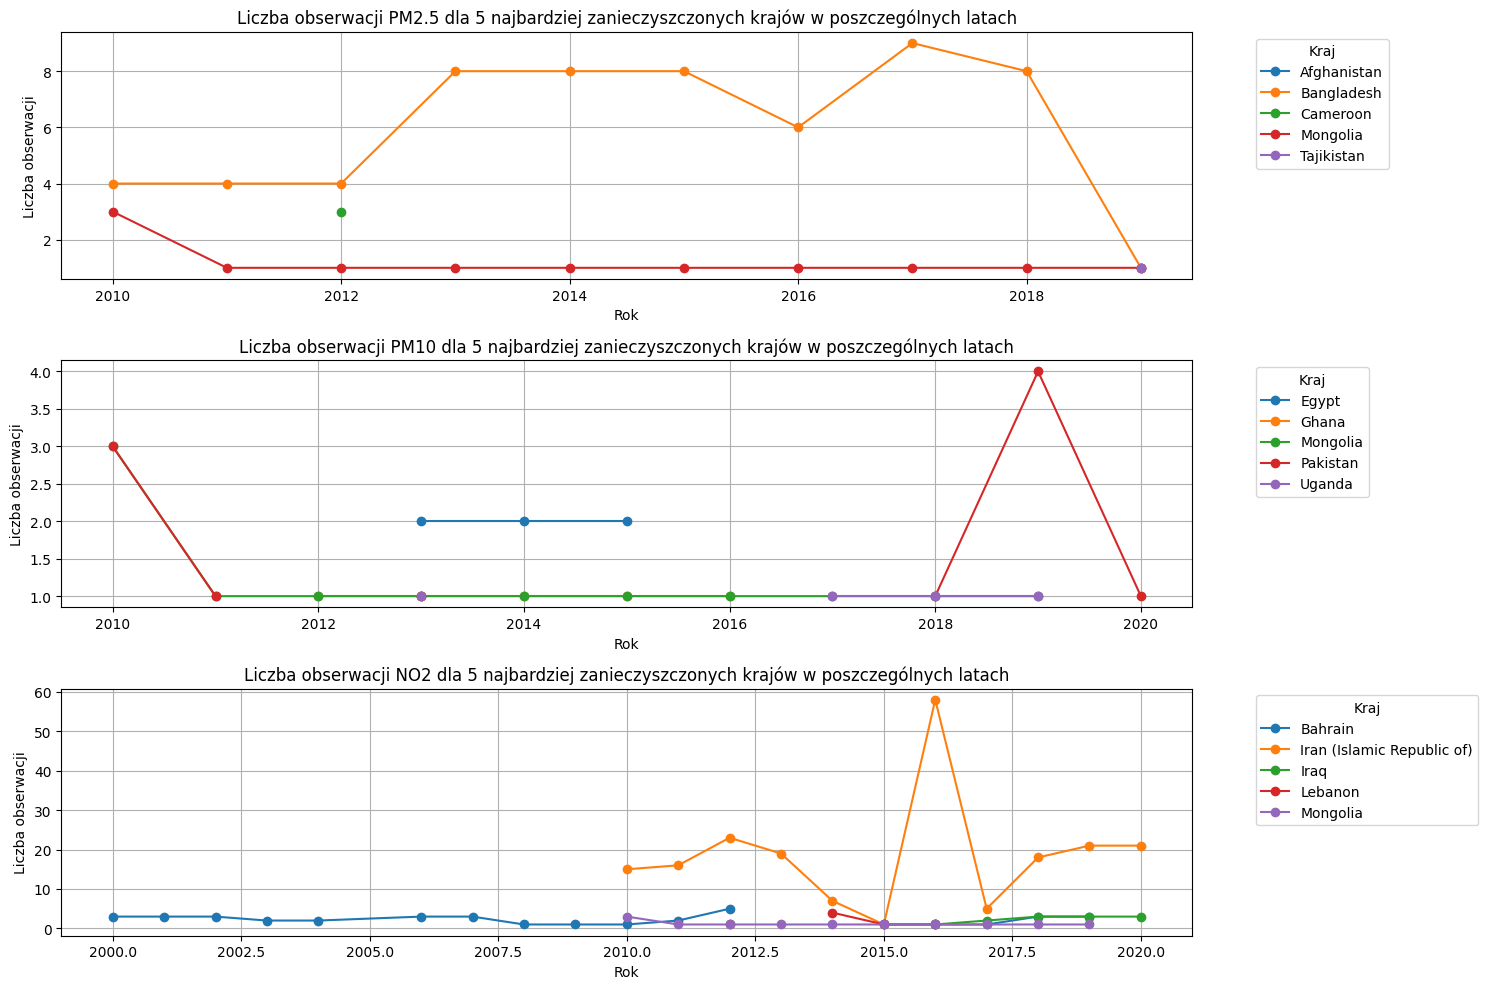

In [28]:
top_5_countries_pm25 = country_stats['PM2.5 (μg/m3)']['mean'].nlargest(5).index
top_5_countries_pm10 = country_stats['PM10 (μg/m3)']['mean'].nlargest(5).index
top_5_countries_no2 = country_stats['NO2 (μg/m3)']['mean'].nlargest(5).index

top_5_data_pm25 = who_data[who_data['WHO Country Name'].isin(top_5_countries_pm25)]
top_5_data_pm10 = who_data[who_data['WHO Country Name'].isin(top_5_countries_pm10)]
top_5_data_no2 = who_data[who_data['WHO Country Name'].isin(top_5_countries_no2)]

observations_pm25 = top_5_data_pm25.groupby(['Measurement Year', 'WHO Country Name']).size().unstack()
observations_pm10 = top_5_data_pm10.groupby(['Measurement Year', 'WHO Country Name']).size().unstack()
observations_no2 = top_5_data_no2.groupby(['Measurement Year', 'WHO Country Name']).size().unstack()

plt.figure(figsize=[15, 10])

plt.subplot(3, 1, 1)
observations_pm25.plot(ax=plt.gca(), marker='o')
plt.title('Liczba obserwacji PM2.5 dla 5 najbardziej zanieczyszczonych krajów w poszczególnych latach')
plt.xlabel('Rok')
plt.ylabel('Liczba obserwacji')
plt.legend(title='Kraj', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

plt.subplot(3, 1, 2)
observations_pm10.plot(ax=plt.gca(), marker='o')
plt.title('Liczba obserwacji PM10 dla 5 najbardziej zanieczyszczonych krajów w poszczególnych latach')
plt.xlabel('Rok')
plt.ylabel('Liczba obserwacji')
plt.legend(title='Kraj', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

plt.subplot(3, 1, 3)
observations_no2.plot(ax=plt.gca(), marker='o')
plt.title('Liczba obserwacji NO2 dla 5 najbardziej zanieczyszczonych krajów w poszczególnych latach')
plt.xlabel('Rok')
plt.ylabel('Liczba obserwacji')
plt.legend(title='Kraj', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

plt.tight_layout()

Kraje, posiadające najwyższe średnie wartości zanieczyszczeń są bardzo rzadko badane. Obserwacja ta wydaje się być nielogiczna - posiadając wysokie wartości stężeń tych cząstek powinno się je często badać oraz podejmować kroki w celu ich redukcji. Niestety kraje są często średnio rozwinięte i niezamożne, które nie są odpowiednio wyedukowane o skutkach niewłściwej polityki klimatyczne.

### Ilość obserwacji dla krajów z najniższymi stężeniami zanieczyszczeń

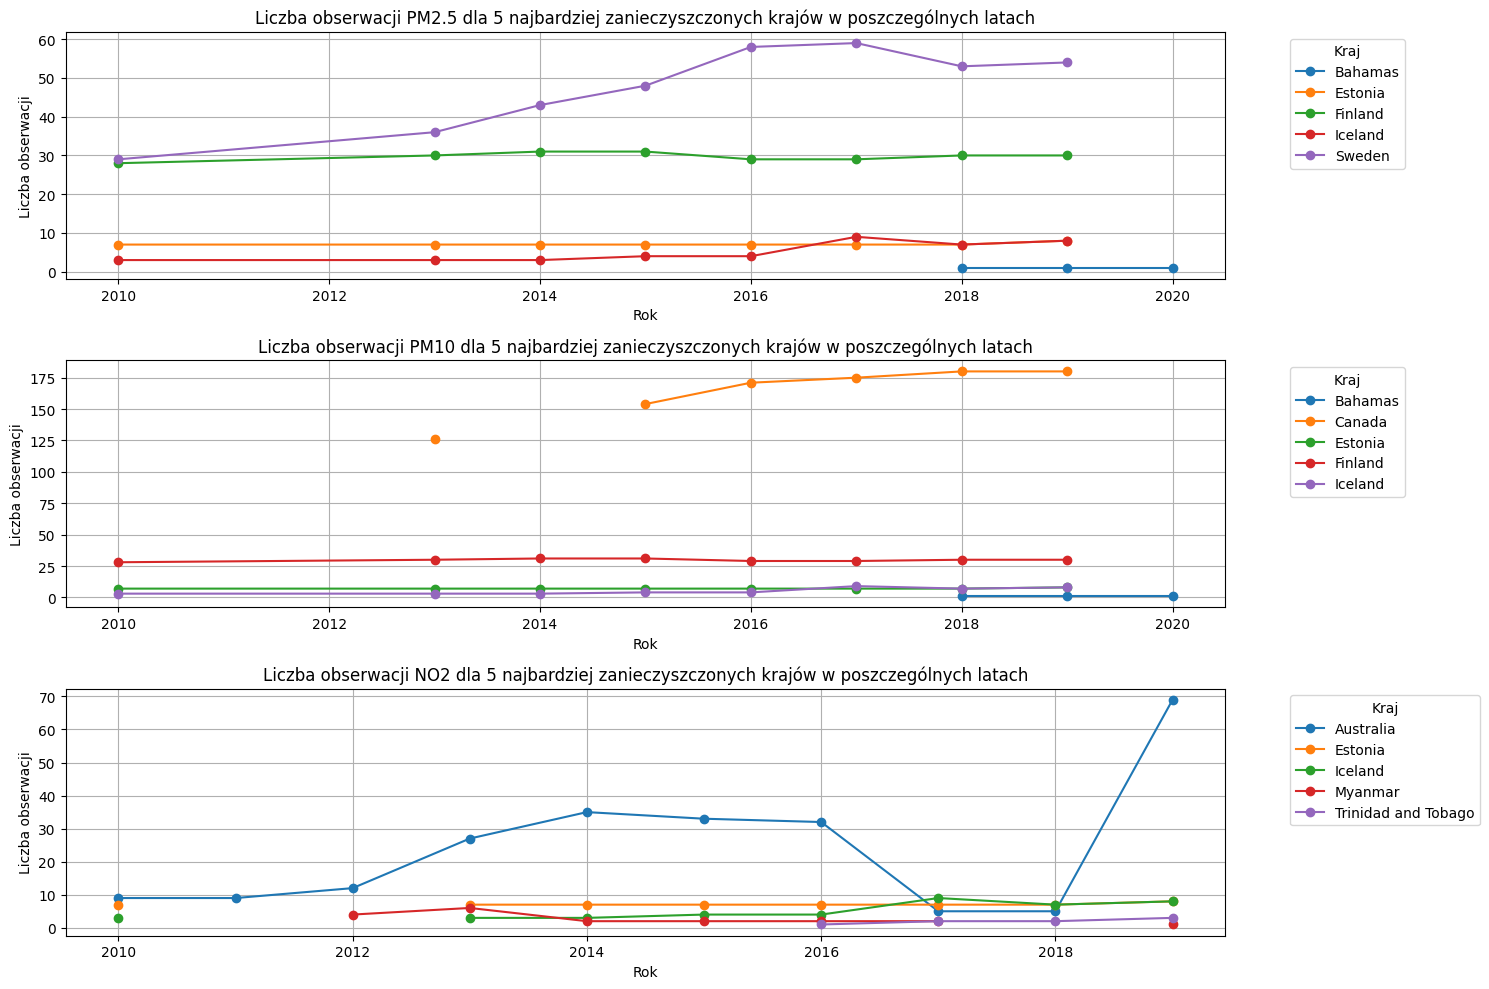

In [29]:
less_5_countries_pm25 = country_stats['PM2.5 (μg/m3)']['mean'].nsmallest(5).index
less_5_countries_pm10 = country_stats['PM10 (μg/m3)']['mean'].nsmallest(5).index
less_5_countries_no2 = country_stats['NO2 (μg/m3)']['mean'].nsmallest(5).index

less_5_data_pm25 = who_data[who_data['WHO Country Name'].isin(less_5_countries_pm25)]
less_5_data_pm10 = who_data[who_data['WHO Country Name'].isin(less_5_countries_pm10)]
less_5_data_no2 = who_data[who_data['WHO Country Name'].isin(less_5_countries_no2)]

less_observations_pm25 = less_5_data_pm25.groupby(['Measurement Year', 'WHO Country Name']).size().unstack()
less_observations_pm10 = less_5_data_pm10.groupby(['Measurement Year', 'WHO Country Name']).size().unstack()
less_observations_no2 = less_5_data_no2.groupby(['Measurement Year', 'WHO Country Name']).size().unstack()

plt.figure(figsize=[15, 10])

plt.subplot(3, 1, 1)
less_observations_pm25.plot(ax=plt.gca(), marker='o')
plt.title('Liczba obserwacji PM2.5 dla 5 najbardziej zanieczyszczonych krajów w poszczególnych latach')
plt.xlabel('Rok')
plt.ylabel('Liczba obserwacji')
plt.legend(title='Kraj', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

plt.subplot(3, 1, 2)
less_observations_pm10.plot(ax=plt.gca(), marker='o')
plt.title('Liczba obserwacji PM10 dla 5 najbardziej zanieczyszczonych krajów w poszczególnych latach')
plt.xlabel('Rok')
plt.ylabel('Liczba obserwacji')
plt.legend(title='Kraj', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

plt.subplot(3, 1, 3)
less_observations_no2.plot(ax=plt.gca(), marker='o')
plt.title('Liczba obserwacji NO2 dla 5 najbardziej zanieczyszczonych krajów w poszczególnych latach')
plt.xlabel('Rok')
plt.ylabel('Liczba obserwacji')
plt.legend(title='Kraj', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

plt.tight_layout()

Kraje posiadające najniższe stężenia posiadają wiekszą liczbę obserwacji niż te posiadające najwyższe stężenia. Mimo to, liczba ta dalej nie jest wysoka.

### Liczba obserwacji w każdym z regionów

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117],
 [Text(0, 0, 'China'),
  Text(1, 0, 'Italy'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Spain'),
  Text(4, 0, 'India'),
  Text(5, 0, 'France'),
  Text(6, 0, 'United States of America'),
  Text(7, 0, 'Poland'),
  Text(8, 0, 'Switzerland'),
  Text(9, 0, 'Canada'),
  Text(10, 0, 'Austria'

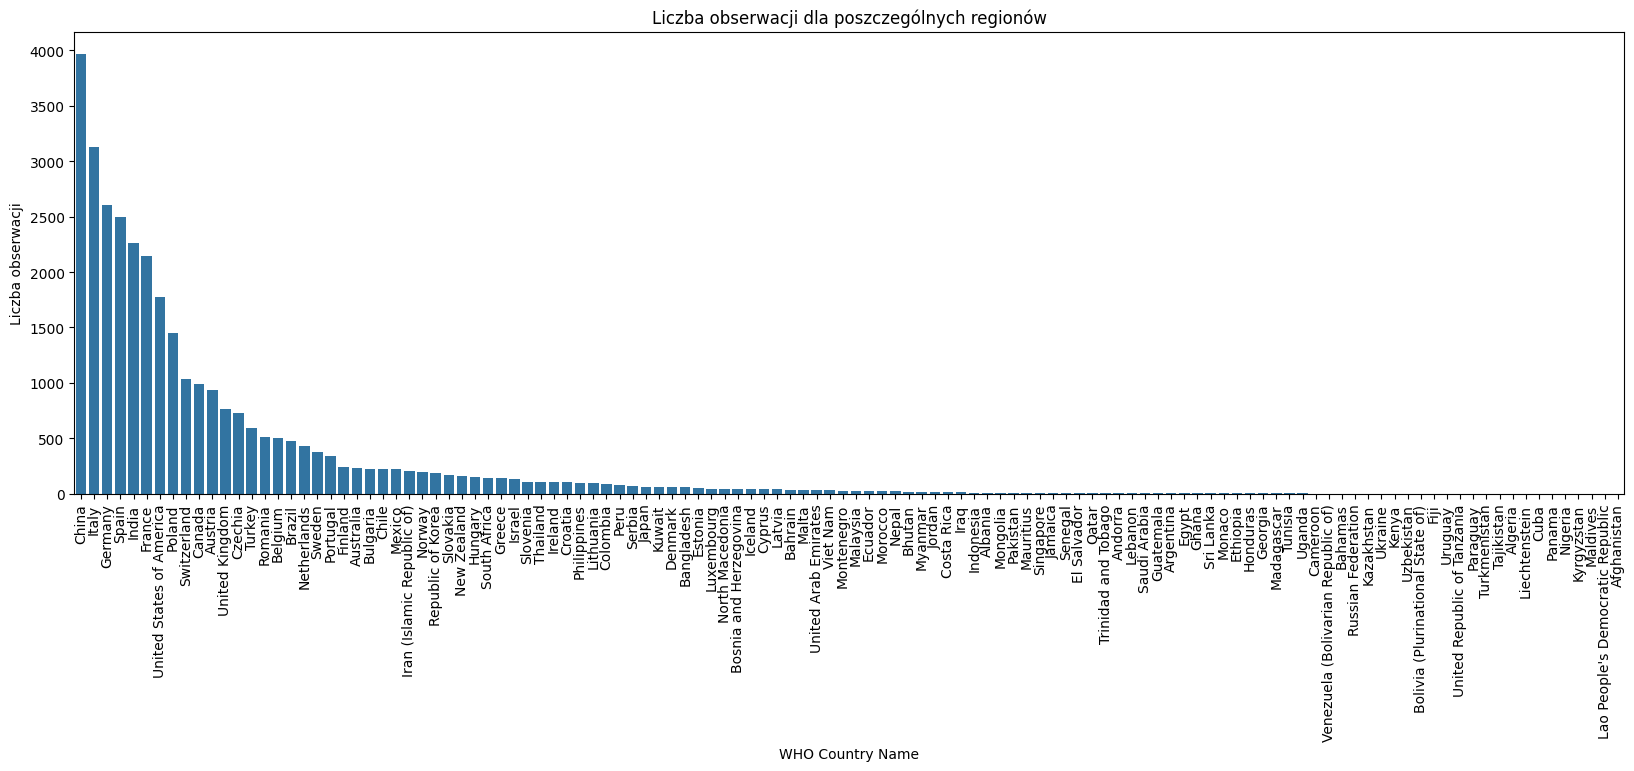

In [30]:
#poszukac dalej jak usunac te wartosci wyswietlane przez jupytera bo szpącą
plt.figure(figsize = [20, 6])
country_counts = who_data['WHO Country Name'].value_counts()
sns.barplot(x = country_counts.index, y = country_counts.values)
plt.title('Liczba obserwacji dla poszczególnych regionów')
plt.xlabel('WHO Country Name')
plt.ylabel('Liczba obserwacji')
plt.xticks(rotation = 90)

Krajem najczęściej badanym są Chiny, a następnie kraje Europejskie - Włochy, Niemcy, Hiszpania. Czołową piątke zamykają Indie.
\
Bazując na liczbie obswerwacji zdecydowano do dalszej analizy wybrać kraje, w których liczba obserwacji jest większa niż 100.

### Zmiana ilości obserwacji w latach 5 najczęściej występujących krajów

<Figure size 1000x600 with 0 Axes>

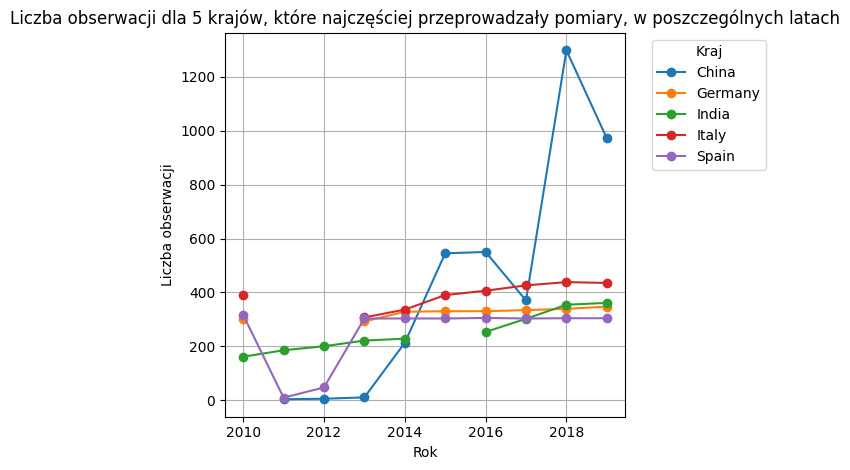

In [31]:
top_5_countries_most_measurements = who_data['WHO Country Name'].value_counts().nlargest(5).index
top_5_data_most_measurements = who_data[who_data['WHO Country Name'].isin(top_5_countries_most_measurements)]
observations_most_measurements = top_5_data_most_measurements.groupby(['Measurement Year', 'WHO Country Name']).size().unstack()

plt.figure(figsize=[10, 6])
observations_most_measurements.plot(marker='o')
plt.title('Liczba obserwacji dla 5 krajów, które najczęściej przeprowadzały pomiary, w poszczególnych latach')
plt.xlabel('Rok')
plt.ylabel('Liczba obserwacji')
plt.legend(title='Kraj', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()

Dlakrajów z najczęstrzymi pomiarami od 2014 roku liczba pomiarów z roku na rok delikatnie rośnie. Wyjątkiem jest lider - Chiny, który w roku 2017 zanotował ogromny ponad 300% wzrost ilości obserwacji i delikatny spadek po roku 2018. Wzrost z 2017 roku wysunał ich na pierwsze miejsce w rankingu z ogromną przewagą (około 1000 pomiarów rocznych do +/- 400).

In [32]:
country_obs_counts = who_data.groupby(['WHO Country Name', 'Measurement Year']).size().unstack().sum(axis=1)
countries_over_100_obs = country_obs_counts[country_obs_counts > 100].index

#print("Kraje, dla których liczba obserwacji jest większa niż 100:")
#print(countries_over_100_obs)

top_5_pm25_largest = country_stats.loc[countries_over_100_obs, ('PM2.5 (μg/m3)', 'mean')].nlargest(5)
top_5_pm10_largest = country_stats.loc[countries_over_100_obs, ('PM10 (μg/m3)', 'mean')].nlargest(5)
top_5_no2_largest = country_stats.loc[countries_over_100_obs, ('NO2 (μg/m3)', 'mean')].nlargest(5)

print("Top 5 kraje o najwyższych średnich stężeniach PM2.5 (powyzej 100 obserwacji):")
print(country_stats.loc[top_5_pm25_largest.index, [('PM2.5 (μg/m3)', 'mean'), ('PM2.5 (μg/m3)', 'median'), ('PM2.5 (μg/m3)', 'std')]])
print("Top 5 kraje o najwyższych średnich stężeniach PM10 (powyzej 100 obserwacji):")
print(country_stats.loc[top_5_pm10_largest.index, [('PM2.5 (μg/m3)', 'mean'), ('PM2.5 (μg/m3)', 'median'), ('PM2.5 (μg/m3)', 'std')]])
print("Top 5 kraje o najwyższych średnich stężeniach NO2 (powyzej 100 obserwacji):")
print(country_stats.loc[top_5_no2_largest.index, [('PM2.5 (μg/m3)', 'mean'), ('PM2.5 (μg/m3)', 'median'), ('PM2.5 (μg/m3)', 'std')]])

Top 5 kraje o najwyższych średnich stężeniach PM2.5 (powyzej 100 obserwacji):
                           PM2.5 (μg/m3)                  
                                    mean median        std
WHO Country Name                                          
China                          43.072988  41.49  16.356075
India                          40.444798  36.00  20.200245
Iran (Islamic Republic of)     31.508929  29.25  14.604950
Philippines                    29.710526  29.00  11.361166
Chile                          24.977411  25.41   9.976247
Top 5 kraje o najwyższych średnich stężeniach PM10 (powyzej 100 obserwacji):
                           PM2.5 (μg/m3)                  
                                    mean median        std
WHO Country Name                                          
Iran (Islamic Republic of)     31.508929  29.25  14.604950
India                          40.444798  36.00  20.200245
China                          43.072988  41.49  16.356075
Chile              

Rankingi krajów gdzie liczba obserwacji jest większa od 100 ukazują, że najbardziej zanieczyszczone mierzonymi cząstkami są Chiny (kraj tworzący pomiary najczęściej), Indie oraz Iran. 

In [33]:
top_5_pm25_smallest = country_stats.loc[countries_over_100_obs, ('PM2.5 (μg/m3)', 'mean')].nsmallest(5)
top_5_pm10_smallest = country_stats.loc[countries_over_100_obs, ('PM10 (μg/m3)', 'mean')].nsmallest(5)
top_5_no2_smallest = country_stats.loc[countries_over_100_obs, ('NO2 (μg/m3)', 'mean')].nsmallest(5)

print("Top 5 kraje o najniższych średnich stężeniach PM2.5 (powyzej 100 obserwacji):")
print(country_stats.loc[top_5_pm25_smallest.index, [('PM2.5 (μg/m3)', 'mean'), ('PM2.5 (μg/m3)', 'median'), ('PM2.5 (μg/m3)', 'std')]])
print("Top 5 kraje o najniższych średnich stężeniach PM10 (powyzej 100 obserwacji):")
print(country_stats.loc[top_5_pm10_smallest.index, [('PM2.5 (μg/m3)', 'mean'), ('PM2.5 (μg/m3)', 'median'), ('PM2.5 (μg/m3)', 'std')]])
print("Top 5 kraje o najniższych średnich stężeniach NO2 (powyzej 100 obserwacji):")
print(country_stats.loc[top_5_no2_smallest.index, [('PM2.5 (μg/m3)', 'mean'), ('PM2.5 (μg/m3)', 'median'), ('PM2.5 (μg/m3)', 'std')]])

Top 5 kraje o najniższych średnich stężeniach PM2.5 (powyzej 100 obserwacji):
                 PM2.5 (μg/m3)                 
                          mean median       std
WHO Country Name                               
Sweden                6.165315  5.900  2.220703
Finland               6.200472  6.135  1.577751
Canada                6.627647  6.025  2.205813
Norway                6.913800  7.135  2.380776
Portugal              7.937835  7.490  3.335800
Top 5 kraje o najniższych średnich stężeniach PM10 (powyzej 100 obserwacji):
                 PM2.5 (μg/m3)                  
                          mean  median       std
WHO Country Name                                
Finland               6.200472   6.135  1.577751
Canada                6.627647   6.025  2.205813
Ireland               8.536531   8.350  2.207306
Norway                6.913800   7.135  2.380776
Switzerland          10.516102  10.100  2.889568
Top 5 kraje o najniższych średnich stężeniach NO2 (powyzej 100 obserw

Najniższe wartości zanieczyszczeń posiadają kraje Skandynawskie oraz Australia i Canada.

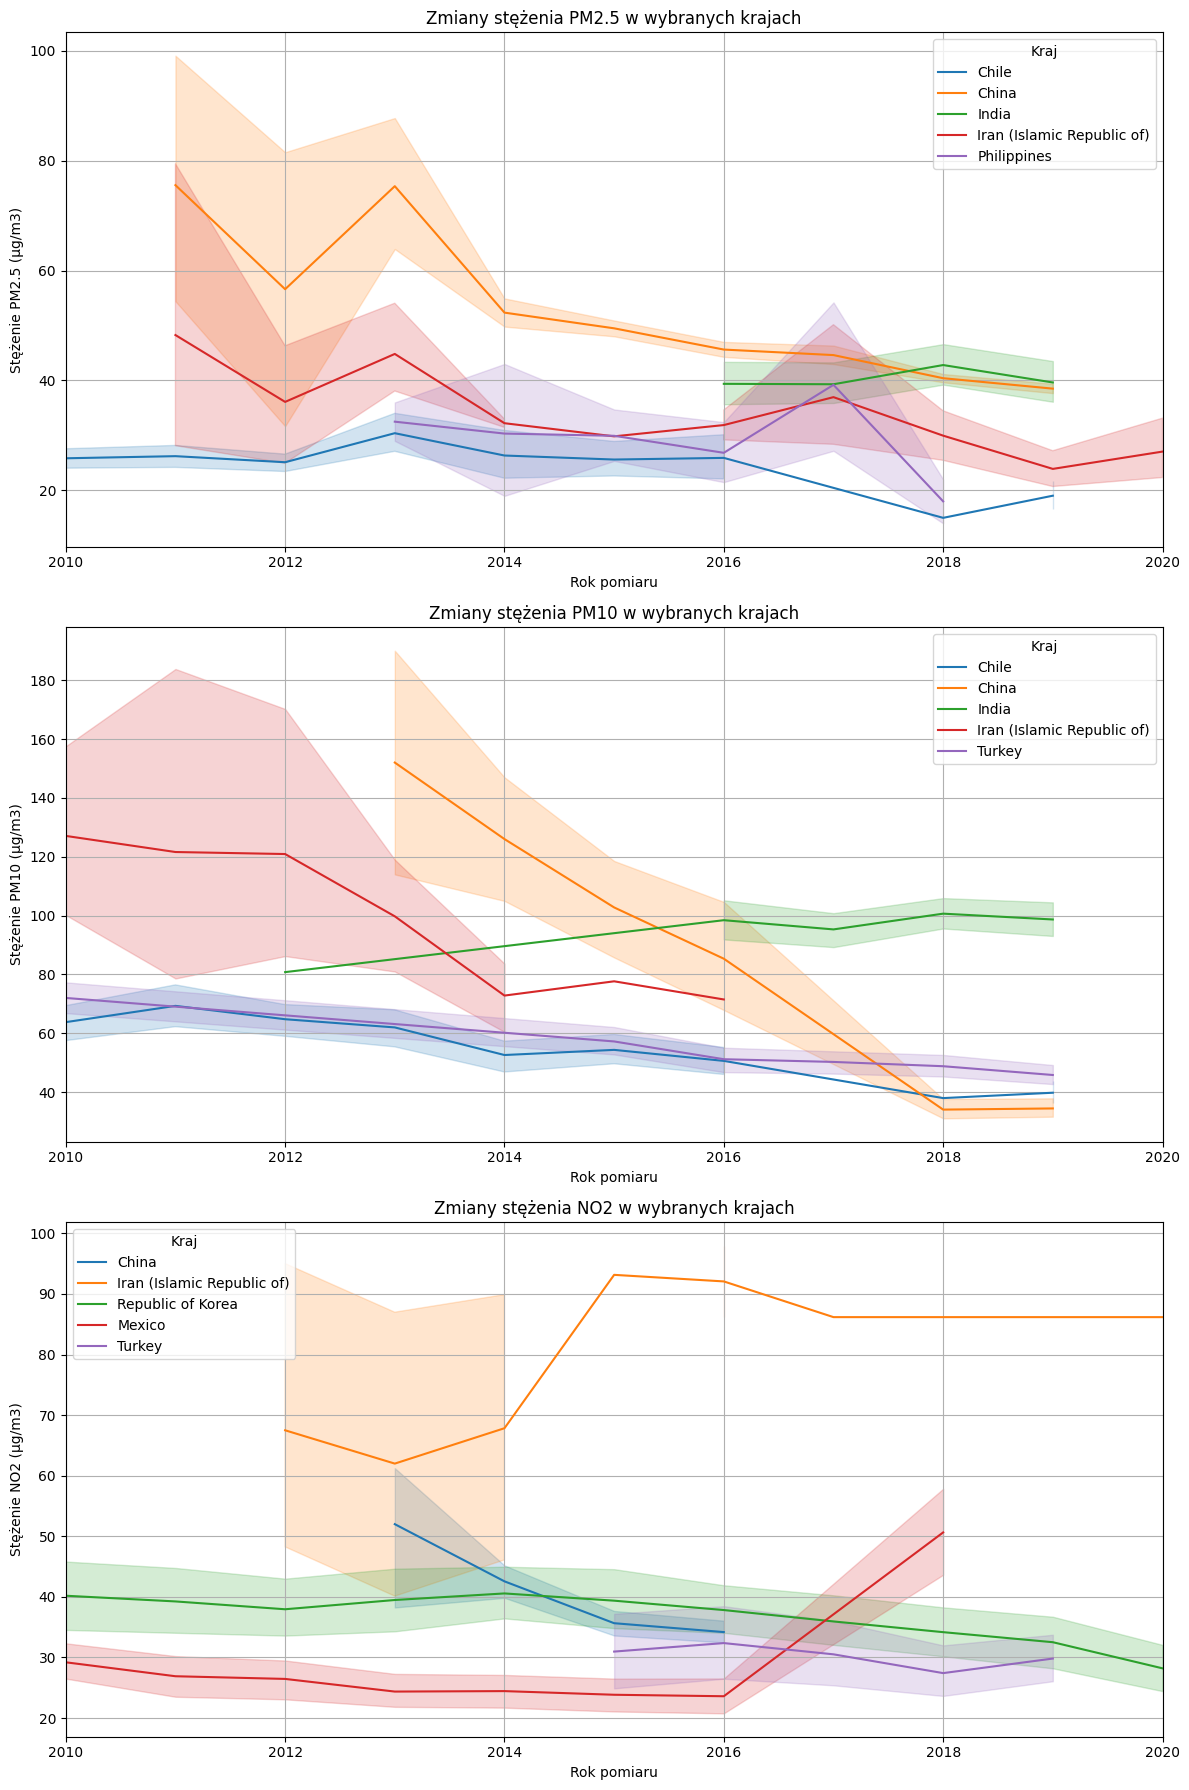

In [34]:
selected_countries_pm25 = who_data[who_data['WHO Country Name'].isin(top_5_pm25_largest.index)]
selected_countries_pm10 = who_data[who_data['WHO Country Name'].isin(top_5_pm10_largest.index)]
selected_countries_no2 = who_data[who_data['WHO Country Name'].isin(top_5_no2_largest.index)]

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

sns.lineplot(data=selected_countries_pm25, x='Measurement Year', y='PM2.5 (μg/m3)', hue='WHO Country Name', ax=axes[0])
axes[0].set_title('Zmiany stężenia PM2.5 w wybranych krajach')
axes[0].set_xlabel('Rok pomiaru')
axes[0].set_ylabel('Stężenie PM2.5 (μg/m3)')
axes[0].set_xlim(selected_countries_pm25['Measurement Year'].min(), selected_countries_pm25['Measurement Year'].max())
axes[0].legend(title='Kraj')
axes[0].grid()

sns.lineplot(data=selected_countries_pm10, x='Measurement Year', y='PM10 (μg/m3)', hue='WHO Country Name', ax=axes[1])
axes[1].set_title('Zmiany stężenia PM10 w wybranych krajach')
axes[1].set_xlabel('Rok pomiaru')
axes[1].set_ylabel('Stężenie PM10 (μg/m3)')
axes[1].set_xlim(selected_countries_pm10['Measurement Year'].min(), selected_countries_pm10['Measurement Year'].max())
axes[1].legend(title='Kraj')
axes[1].grid()

sns.lineplot(data=selected_countries_no2, x='Measurement Year', y='NO2 (μg/m3)', hue='WHO Country Name', ax=axes[2])
axes[2].set_title('Zmiany stężenia NO2 w wybranych krajach')
axes[2].set_xlabel('Rok pomiaru')
axes[2].set_ylabel('Stężenie NO2 (μg/m3)')
axes[2].set_xlim(selected_countries_no2['Measurement Year'].min(), selected_countries_no2['Measurement Year'].max())
axes[2].legend(title='Kraj')
axes[2].grid()

plt.tight_layout()

Widoczne jest wyrażne wypłaszczenie zmian wartości mierzonych stężeń po roku 2016.

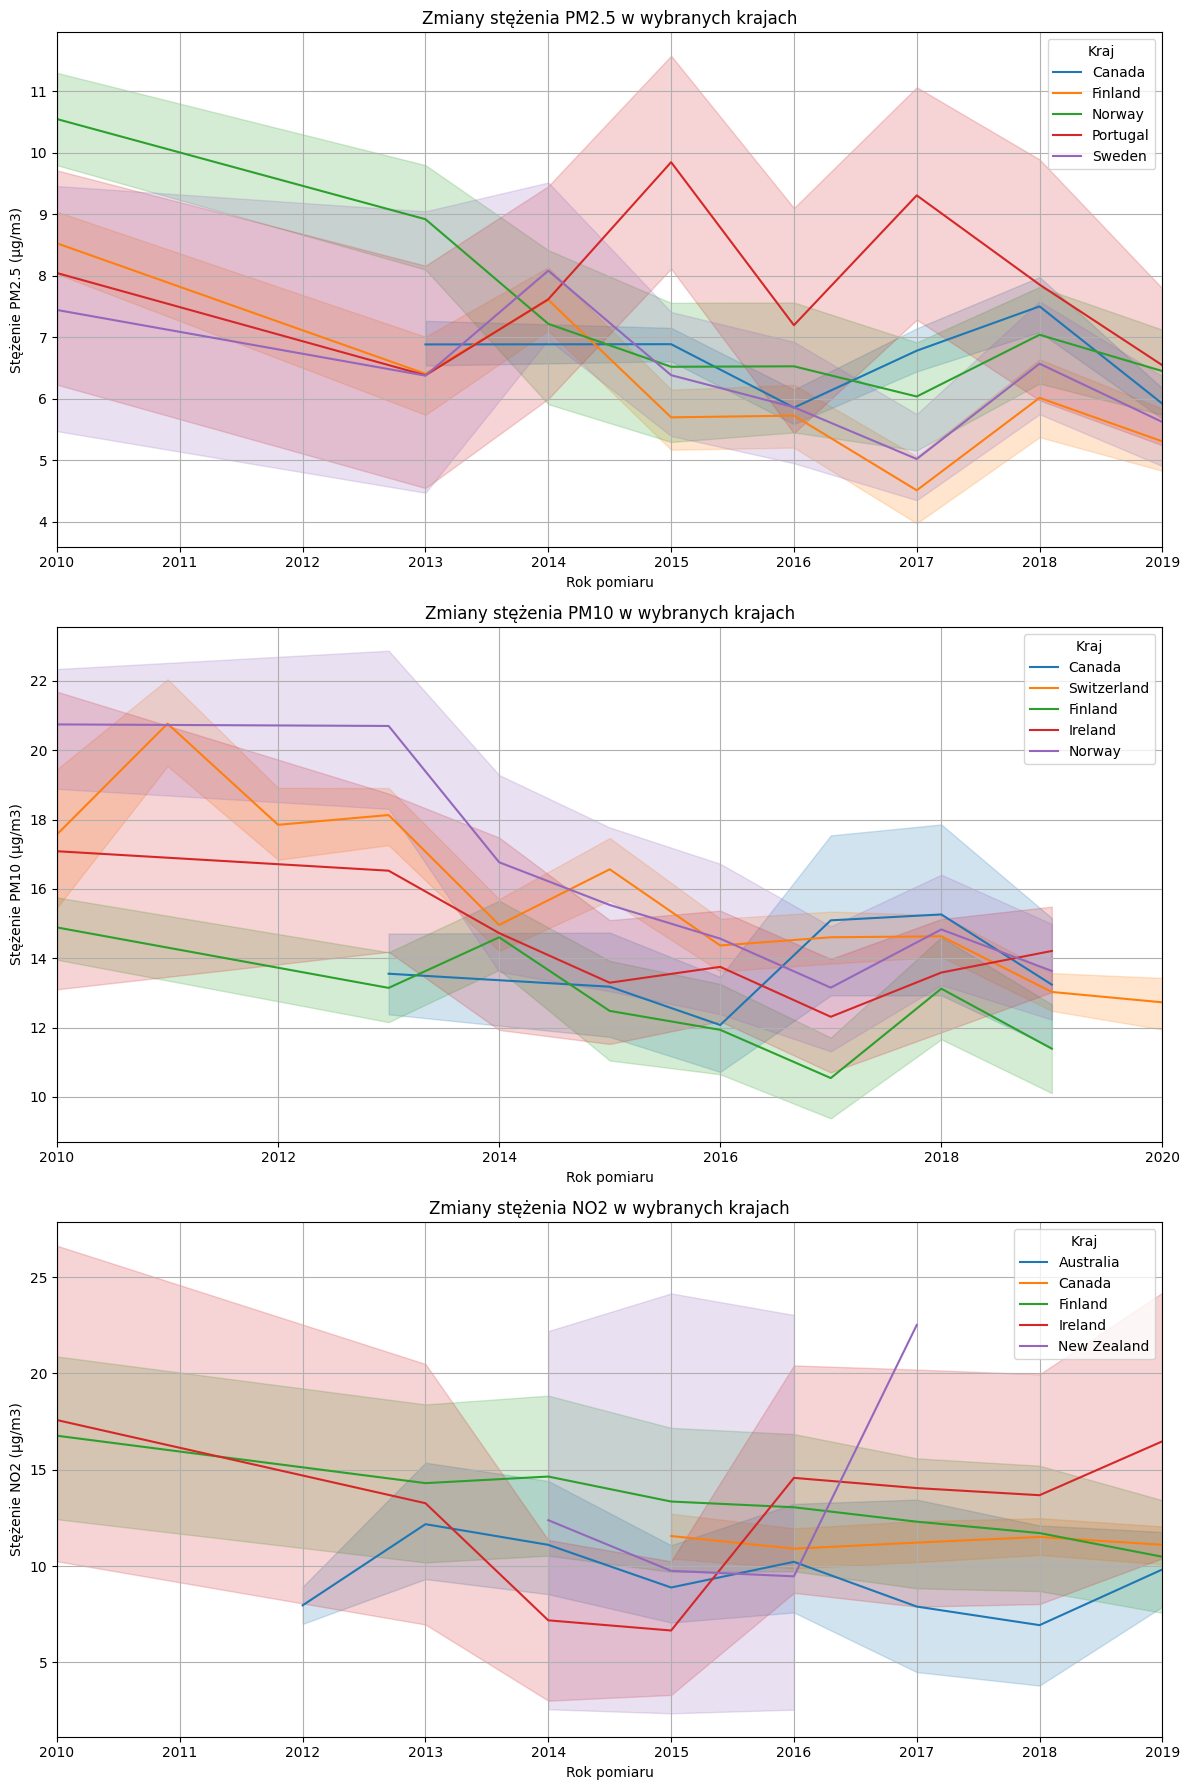

In [35]:
selected_countries_pm25 = who_data[who_data['WHO Country Name'].isin(top_5_pm25_smallest.index)]
selected_countries_pm10 = who_data[who_data['WHO Country Name'].isin(top_5_pm10_smallest.index)]
selected_countries_no2 = who_data[who_data['WHO Country Name'].isin(top_5_no2_smallest.index)]

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

sns.lineplot(data=selected_countries_pm25, x='Measurement Year', y='PM2.5 (μg/m3)', hue='WHO Country Name', ax=axes[0])
axes[0].set_title('Zmiany stężenia PM2.5 w wybranych krajach')
axes[0].set_xlabel('Rok pomiaru')
axes[0].set_ylabel('Stężenie PM2.5 (μg/m3)')
axes[0].set_xlim(selected_countries_pm25['Measurement Year'].min(), selected_countries_pm25['Measurement Year'].max())
axes[0].legend(title='Kraj')
axes[0].grid()

sns.lineplot(data=selected_countries_pm10, x='Measurement Year', y='PM10 (μg/m3)', hue='WHO Country Name', ax=axes[1])
axes[1].set_title('Zmiany stężenia PM10 w wybranych krajach')
axes[1].set_xlabel('Rok pomiaru')
axes[1].set_ylabel('Stężenie PM10 (μg/m3)')
axes[1].set_xlim(selected_countries_pm10['Measurement Year'].min(), selected_countries_pm10['Measurement Year'].max())
axes[1].legend(title='Kraj')
axes[1].grid()

sns.lineplot(data=selected_countries_no2, x='Measurement Year', y='NO2 (μg/m3)', hue='WHO Country Name', ax=axes[2])
axes[2].set_title('Zmiany stężenia NO2 w wybranych krajach')
axes[2].set_xlabel('Rok pomiaru')
axes[2].set_ylabel('Stężenie NO2 (μg/m3)')
axes[2].set_xlim(selected_countries_no2['Measurement Year'].min(), selected_countries_no2['Measurement Year'].max())
axes[2].legend(title='Kraj')
axes[2].grid()

plt.tight_layout()

## c) Miasta

### 10 najczęściej badanych miast

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 [Text(0, 0, 'Saxon'),
  Text(1, 0, 'Avully'),
  Text(2, 0, 'Basel'),
  Text(3, 0, 'Meyrin'),
  Text(4, 0, 'Bern'),
  Text(5, 0, 'Lugano'),
  Text(6, 0, 'Lausanne'),
  Text(7, 0, 'Payerne'),
  Text(8, 0, 'Ebikon'),
  Text(9, 0, 'Opfikon'),
  Text(10, 0, 'Salamanca'),
  Text(11, 0, 'Bratislava'),
  Text(12, 0, 'Ittigen'),
  Text(13, 0, 'Winterthur'),
  Text(14, 0, 'Cuenca'),
  Text(15, 0, 'London'),
  Text(

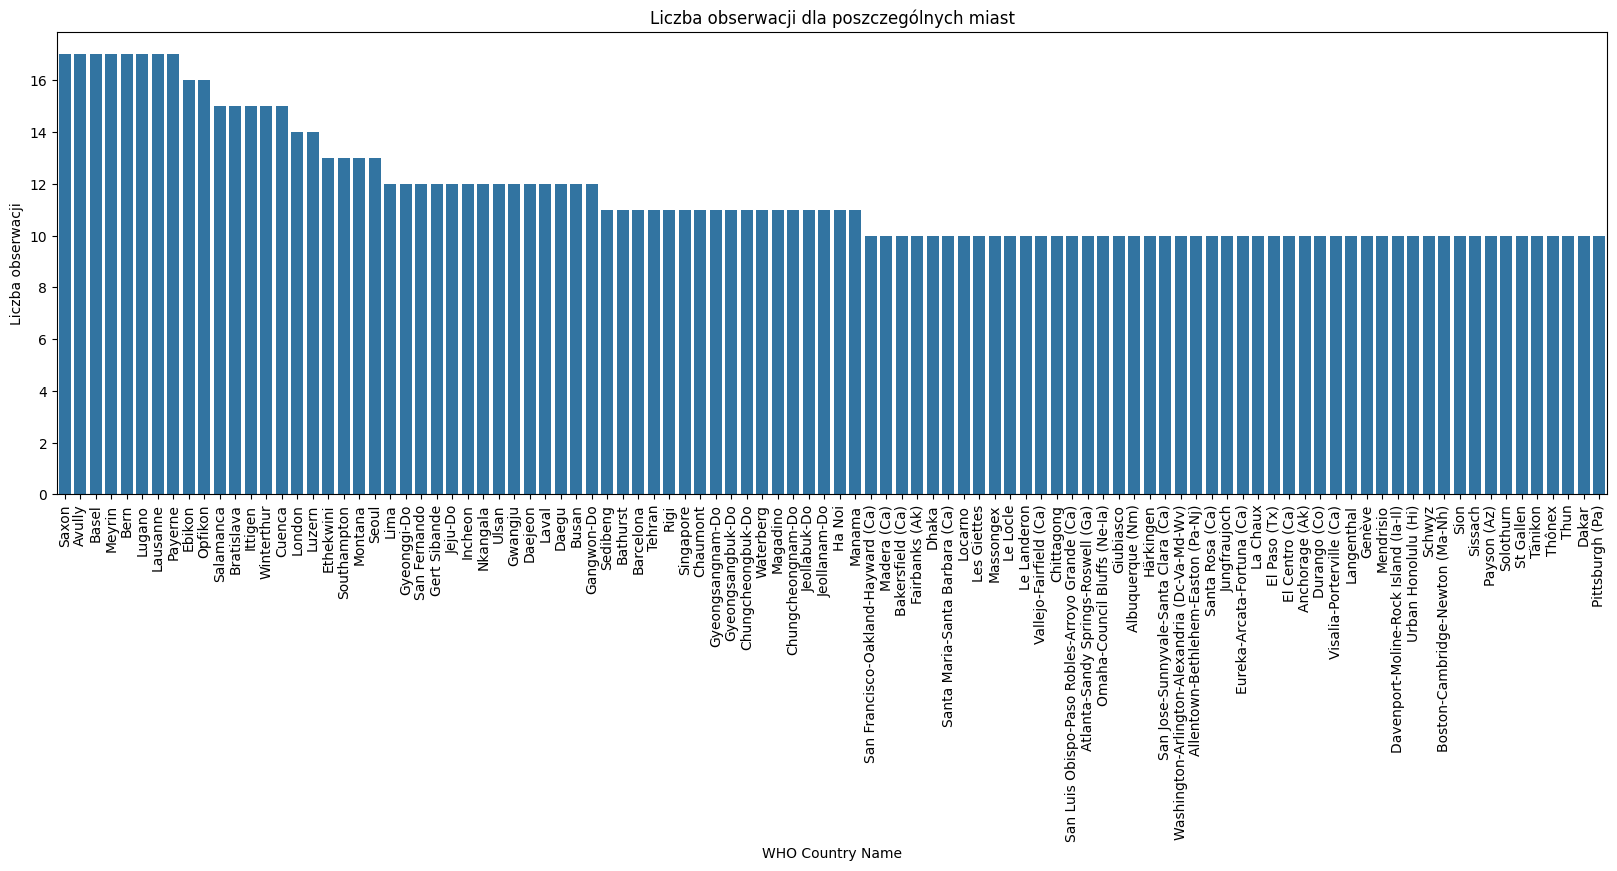

In [36]:
plt.figure(figsize = [20, 6])
cities_counts = who_data['City or Locality'].value_counts()[:100]
sns.barplot(x = cities_counts.index, y = cities_counts.values)
plt.title('Liczba obserwacji dla poszczególnych miast')
plt.xlabel('WHO Country Name')
plt.ylabel('Liczba obserwacji')
plt.xticks(rotation = 90)

In [37]:
#!pip install folium
#!pip install geopy
import folium
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent = 'my_geocoder')
world_map = folium.Map(location = [20, 0], zoom_start = 2)
for city, count in cities_counts.items():
    location = geolocator.geocode(city)
    if location:
        lat, lon = location.latitude, location.longitude 
        folium.Marker([lat, lon], popup = city, icon = folium.Icon(color = 'red')).add_to(world_map)
world_map

### 10 miast posiadających największą średnią wartość stężeń

In [38]:
cities_stats = who_data.groupby('City or Locality').agg({'PM2.5 (μg/m3)': ['mean', 'median', 'std'],
                                                   'PM10 (μg/m3)': ['mean', 'median', 'std'],
                                                   'NO2 (μg/m3)': ['mean', 'median', 'std']})
top_10_pm25 = cities_stats.loc[cities_counts.index, 'PM2.5 (μg/m3)']['mean'].nlargest(10)
top_10_pm10 = cities_stats.loc[cities_counts.index, 'PM10 (μg/m3)']['mean'].nlargest(10)
top_10_no2 = cities_stats.loc[cities_counts.index, 'NO2 (μg/m3)']['mean'].nlargest(10)

print("Top 5 kraje o najwyższych średnich stężeniach PM2.5:")
print(cities_stats.loc[top_10_pm25.index, [('PM2.5 (μg/m3)', 'mean'), ('PM2.5 (μg/m3)', 'median'), ('PM2.5 (μg/m3)', 'std')]])

print("\nTop 5 kraje o najwyższych średnich stężeniach PM10:")
print(cities_stats.loc[top_10_pm10.index, [('PM10 (μg/m3)', 'mean'), ('PM10 (μg/m3)', 'median'), ('PM10 (μg/m3)', 'std')]])

print("\nTop 5 kraje o najwyższych średnich stężeniach NO2:")
print(cities_stats.loc[top_10_no2.index, [('NO2 (μg/m3)', 'mean'), ('NO2 (μg/m3)', 'median'), ('NO2 (μg/m3)', 'std')]])

Top 5 kraje o najwyższych średnich stężeniach PM2.5:
                  PM2.5 (μg/m3)                   
                           mean  median        std
City or Locality                                  
Dhaka                 75.353000  73.235  16.798171
Chittagong            69.263000  65.825  14.226632
Manama                57.370000  60.750   7.550490
Ha Noi                52.593333  49.360  14.995133
Sedibeng              36.940000  32.970   9.680417
Tehran                31.610000  31.390   3.597527
Lima                  30.682857  30.140   6.297523
Dakar                 29.880000  29.710   7.497594
Jeollabuk-Do          27.666667  27.500   5.202563
Chungcheongbuk-Do     26.500000  27.000   3.016621

Top 5 kraje o najwyższych średnich stężeniach PM10:
                  PM10 (μg/m3)                    
                          mean   median        std
City or Locality                                  
Dhaka               139.387500  141.065  25.387524
Dakar               135.517

In [39]:
geolocator = Nominatim(user_agent = 'my_geocoder')
world_map = folium.Map(location = [20, 0], zoom_start = 2)
for city in top_10_pm25.index:
    location = geolocator.geocode(city)
    if location:
        lat, lon = location.latitude, location.longitude 
        folium.Marker([lat, lon], popup = city, icon = folium.Icon(color = 'green')).add_to(world_map)
        
for city in top_10_pm10.index:
    location = geolocator.geocode(city)
    if location:
        lat, lon = location.latitude, location.longitude 
        folium.Marker([lat, lon], popup = city, icon = folium.Icon(color = 'blue')).add_to(world_map)
        
for city in top_10_no2.index:
    location = geolocator.geocode(city)
    if location:
        lat, lon = location.latitude, location.longitude 
        folium.Marker([lat, lon], popup = city, icon = folium.Icon(color = 'red')).add_to(world_map)

legend_html = """
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 150px; height: 120px; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color:white;
                 ">
     &nbsp; <strong>Legenda</strong><br>
     &nbsp; PM2.5 &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i><br>
     &nbsp; PM10 &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i><br>
     &nbsp; NO2 &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i>
      </div>
     """
world_map.get_root().html.add_child(folium.Element(legend_html))
world_map

### 10 miast posiadających najniższą średnią wartość stężeń

In [40]:
cities_stats = who_data.groupby('City or Locality').agg({'PM2.5 (μg/m3)': ['mean', 'median', 'std'],
                                                   'PM10 (μg/m3)': ['mean', 'median', 'std'],
                                                   'NO2 (μg/m3)': ['mean', 'median', 'std']})
less_10_pm25 = cities_stats.loc[cities_counts.index, 'PM2.5 (μg/m3)']['mean'].nsmallest(10)
less_10_pm10 = cities_stats.loc[cities_counts.index, 'PM10 (μg/m3)']['mean'].nsmallest(10)
less_10_no2 = cities_stats.loc[cities_counts.index, 'NO2 (μg/m3)']['mean'].nsmallest(10)

print("Top 10 kraje o najniższych średnich stężeniach PM2.5:")
print(cities_stats.loc[less_10_pm25.index, [('PM2.5 (μg/m3)', 'mean'), ('PM2.5 (μg/m3)', 'median'), ('PM2.5 (μg/m3)', 'std')]])

print("\nTop 10 kraje o najniższych średnich stężeniach PM10:")
print(cities_stats.loc[less_10_pm10.index, [('PM10 (μg/m3)', 'mean'), ('PM10 (μg/m3)', 'median'), ('PM10 (μg/m3)', 'std')]])

print("\nTop 10 kraje o najniższych średnich stężeniach NO2:")
print(cities_stats.loc[less_10_no2.index, [('NO2 (μg/m3)', 'mean'), ('NO2 (μg/m3)', 'median'), ('NO2 (μg/m3)', 'std')]])

Top 10 kraje o najniższych średnich stężeniach PM2.5:
                                    PM2.5 (μg/m3)                 
                                             mean median       std
City or Locality                                                  
Urban Honolulu (Hi)                       4.13000  3.685  1.490511
Montana                                   4.80000  4.800  0.424264
Anchorage (Ak)                            5.34300  5.265  0.794915
Rigi                                      5.41000  5.150  0.872353
Boston-Cambridge-Newton (Ma-Nh)           5.45000  5.350  0.804674
Eureka-Arcata-Fortuna (Ca)                5.97500  5.850  0.434933
Le Locle                                  6.00000  6.000       NaN
San Jose-Sunnyvale-Santa Clara (Ca)       6.38125  5.400  2.631395
Santa Maria-Santa Barbara (Ca)            6.50000  7.000  1.513275
Albuquerque (Nm)                          6.90000  6.900       NaN

Top 10 kraje o najniższych średnich stężeniach PM10:
                     

In [41]:
geolocator = Nominatim(user_agent = 'my_geocoder')
world_map = folium.Map(location = [20, 0], zoom_start = 2)
for city in less_10_pm25.index:
    location = geolocator.geocode(city)
    if location:
        lat, lon = location.latitude, location.longitude 
        folium.Marker([lat, lon], popup = city, icon = folium.Icon(color = 'green')).add_to(world_map)
        
for city in less_10_pm10.index:
    location = geolocator.geocode(city)
    if location:
        lat, lon = location.latitude, location.longitude 
        folium.Marker([lat, lon], popup = city, icon = folium.Icon(color = 'blue')).add_to(world_map)
        
for city in less_10_no2.index:
    location = geolocator.geocode(city)
    if location:
        lat, lon = location.latitude, location.longitude 
        folium.Marker([lat, lon], popup = city, icon = folium.Icon(color = 'red')).add_to(world_map)

legend_html = """
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 150px; height: 120px; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color:white;
                 ">
     &nbsp; <strong>Legenda</strong><br>
     &nbsp; PM2.5 &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i><br>
     &nbsp; PM10 &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i><br>
     &nbsp; NO2 &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i>
      </div>
     """
world_map.get_root().html.add_child(folium.Element(legend_html))
world_map

# 4. Mapa 

In [42]:
#!pip install geopandas
import geopandas as gpd

Text(0.5, 0.98, 'Rozkłady stężęń zanieczyszczeń na mapie świata')

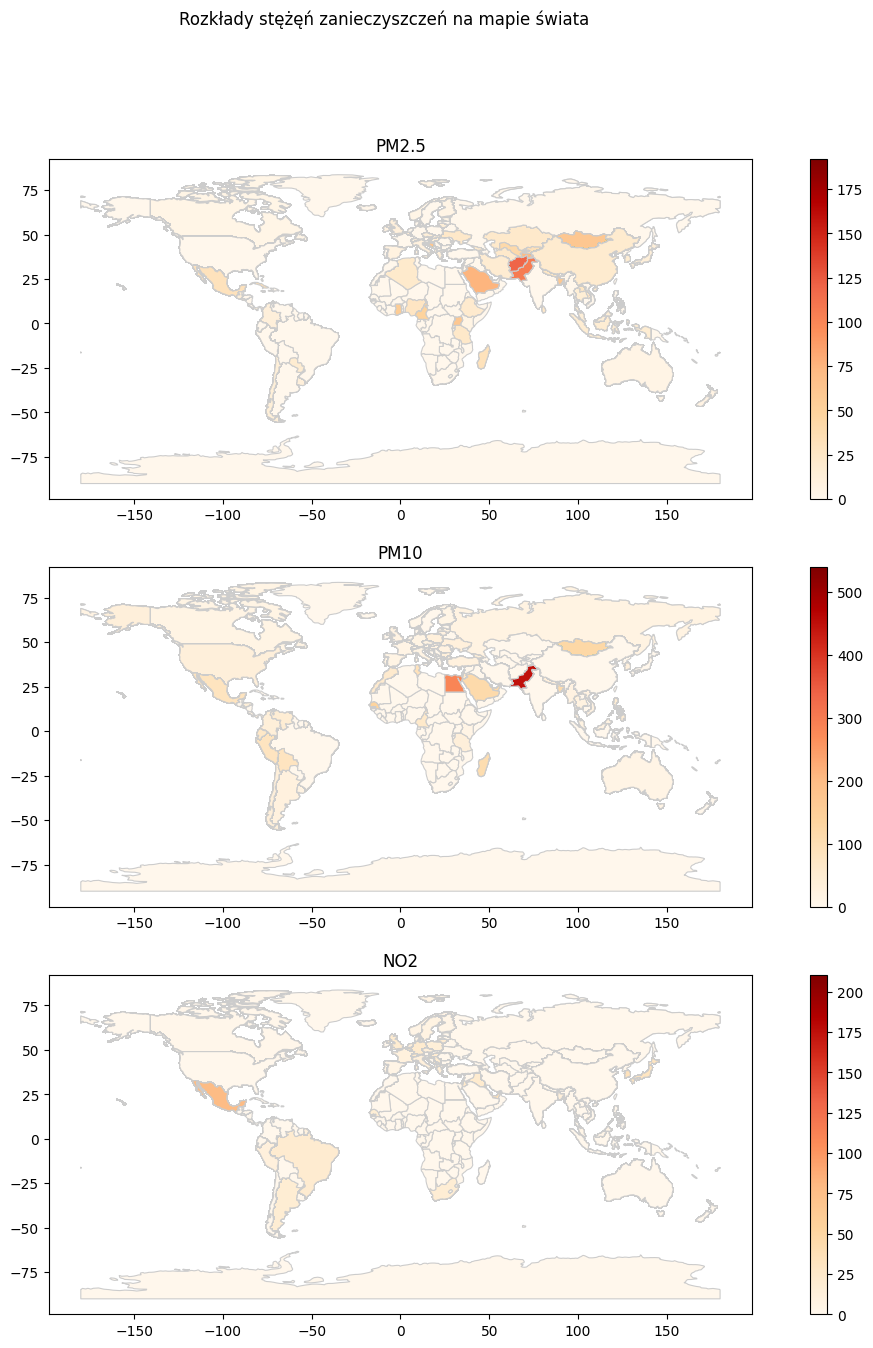

In [43]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.merge(who_data, how='left', left_on='iso_a3', right_on='ISO3')
merged_data[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']] = merged_data[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']].fillna(0)

fig, axes = plt.subplots(3, 1, figsize = [15, 15])
merged_data.plot(column='PM2.5 (μg/m3)', cmap = 'OrRd', linewidth = 0.8, ax = axes[0], edgecolor = '0.8', legend = True)
axes[0].set_title('PM2.5')

merged_data.plot(column='PM10 (μg/m3)', cmap = 'OrRd', linewidth = 0.8, ax = axes[1], edgecolor = '0.8', legend = True)
axes[1].set_title('PM10')

merged_data.plot(column='NO2 (μg/m3)', cmap = 'OrRd', linewidth = 0.8, ax = axes[2], edgecolor = '0.8', legend = True)
axes[2].set_title('NO2')

fig.suptitle("Rozkłady stężęń zanieczyszczeń na mapie świata")

# 5. Wnioski na temat wpływu zanieczyszczenia powietrza na dane regiony, kraje i miasta.
Po wykonanej analizie, nasuwające się wnioski to:
- Kraje dobrze rozwinięte (głównie kraje Europejskie, ale również część Azji oraz Ameryka) badają stężenia zanieczyszczeń znacznie częściej niż kraje słabo rozwinięte (między innymi Afryka).
- W krajach częsciej badających stężenia zanieczyszczeń widoczne jest ustabliziowanie lub spadek wielkości stężęń badanych cząstek.
- Kraje wysoko rozwinięte posiadają niższe stężęń zanieczyszeń niz kraje słabo rozwinięte.
- Na badanym okresie widoczny jest wzrost ilości badanych próbek z roku na rok.
  

# 6. Potencjalne zastosowania wykorzystanych danych w uczeniu maszynowym

Po wykonaniu EDA na różnych poziomach generalizacji:
- Zbiór wydaje się być dobrym do próby stworzenia na nim modelu uczenia maszynowego przewidującego stężenia zanieczyszczeń w danej stacji w przyszłości.
- Dodatkowo istnieje możliwość implementacji modelu, który bazując na danych wartościach zanieczyszczeń spróbuje przewidzieć z jakiego rejonu, kraju lub stacji pochodziły dane.
- Ciekawa wydaje się być również próba estymacji zmiany liczby pomieranych próbek przez kraj w zależności od zmiany stężeń zanieczyszczeń.